## Loan Case Study 

## **Univariate Analysis**

In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data file
loan = pd.read_csv('loan.csv')

In [3]:
#check the shape of the dataframe
loan.shape

(39717, 111)

In [4]:
# first few records
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# numerical attributes described
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Check missing values and clean them:-

In [6]:
# check missing values
missing = 100 * (loan.isnull().sum()/loan.shape[0])
missing[missing > 0].sort_values(ascending = False)[:10]

total_il_high_credit_limit    100.0
mo_sin_old_rev_tl_op          100.0
bc_util                       100.0
bc_open_to_buy                100.0
total_bc_limit                100.0
acc_open_past_24mths          100.0
inq_last_12m                  100.0
total_cu_tl                   100.0
inq_fi                        100.0
total_rev_hi_lim              100.0
dtype: float64

In [7]:
# drop columns with no data at all (all missing)
missing_cols = missing[missing == 100].index.tolist()
loan.drop(columns=missing_cols,axis=1,inplace=True)

In [8]:
# check missing values again
missing = 100 * (loan.isnull().sum()/loan.shape[0])
missing[missing > 0].sort_values(ascending = False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

In [9]:
#Drop columns not useful for analysis
loan.drop(columns=['member_id','zip_code','collections_12_mths_ex_med','title','tax_liens','last_credit_pull_d','last_pymnt_d','desc','emp_title','next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan=loan.loc[:,loan.nunique()!=1]

In [10]:
# check missing values again
missing = 100 * (loan.isnull().sum()/loan.shape[0])
missing[missing > 0].sort_values(ascending = False)

emp_length              2.706650
pub_rec_bankruptcies    1.754916
revol_util              0.125891
dtype: float64

In [11]:
#removing NaN values from rows.
loan=loan[~loan.pub_rec_bankruptcies.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan=loan[~loan.revol_util.isnull()]
# check missing values again
missing = 100 * (loan.isnull().sum()/loan.shape[0])
missing[missing > 0].sort_values(ascending = False)

Series([], dtype: float64)

In [12]:
pd.set_option('display.max_columns', 55)
print(loan.shape)
loan.head()

(37898, 38)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0


In [13]:
# cleaning
loan["term"]= loan["term"].str.replace("months", "")
loan["int_rate"]= loan["int_rate"].str.replace("%", "")

In [14]:
# check emp_length values
loan.emp_length.value_counts()

10+ years    8759
< 1 year     4404
2 years      4299
3 years      4030
4 years      3384
5 years      3245
1 year       3142
6 years      2194
7 years      1748
8 years      1452
9 years      1241
Name: emp_length, dtype: int64

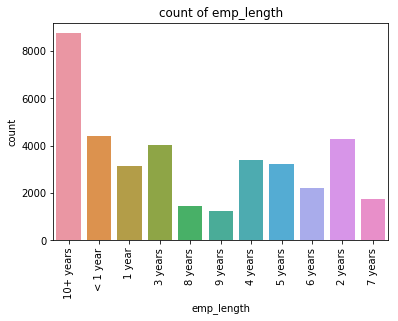

In [15]:
sns.countplot(data=loan,x='emp_length')
plt.xticks(rotation=90)
plt.title('count of emp_length')
plt.show()

In [16]:
# emp_length cleaning
loan["emp_length"]= loan["emp_length"].str.replace("10+ years", "10")
loan["emp_length"]= loan["emp_length"].str.replace("< 1 year", "0")
loan["emp_length"]= loan["emp_length"].str.replace("years", "")
loan["emp_length"]= loan["emp_length"].str.replace("year", "")
loan["emp_length"]= loan["emp_length"].str.replace("+", "")

In [17]:
loan['revol_util']=pd.to_numeric(loan['revol_util'].str.replace("%",""))

Fully Paid     31534
Charged Off     5266
Current         1098
Name: loan_status, dtype: int64
****************************************************************************************************


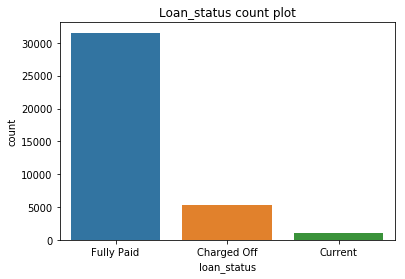

In [18]:
print(loan.loan_status.value_counts())
sns.countplot(data=loan,x='loan_status')
print('*'*100)
plt.title('Loan_status count plot')
plt.show()

Convert loan status to Normal and Charged Off

In [19]:
# convert loan_status to two statuses only removing normal loans
loan=loan[loan.loan_status !='Current']

Fully Paid     31534
Charged Off     5266
Name: loan_status, dtype: int64
****************************************************************************************************


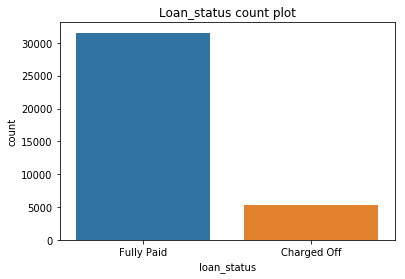

In [20]:
print(loan.loan_status.value_counts())
sns.countplot(data=loan,x='loan_status')
print('*'*100)
plt.title('Loan_status count plot')
plt.show()

In [21]:
# converting to numeric the required columns:-
loan['term'] = pd.to_numeric(loan['term'])
loan['int_rate'] = pd.to_numeric(loan['int_rate'])
loan['emp_length'] = pd.to_numeric(loan['emp_length'])

In [22]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0


### Univariate Analysis 

Home_ownership variation

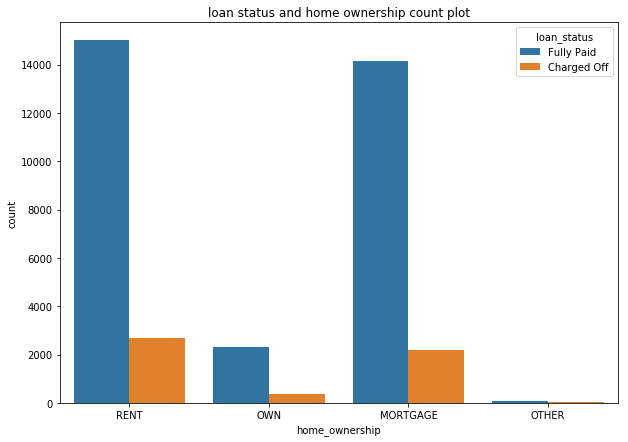

In [23]:
# home_ownership variation
plt.figure(figsize=(10,7))
sns.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.title('loan status and home ownership count plot')
plt.show()

The chances of being Charged Off are more if the consumer rents/mortgages the home.

Loan amount variation

In [24]:
# loan amount could be an important feature as there is diffence in statistics across loan status
print('Mean loan amt',loan.groupby('loan_status')['loan_amnt'].mean())
print('*'*100)
print('median loan amt',loan.groupby('loan_status')['loan_amnt'].median())
print('*'*100)
print('max loan amt',loan.groupby('loan_status')['loan_amnt'].max())
print('*'*100)
print('min loan amt',loan.groupby('loan_status')['loan_amnt'].min())

Mean loan amt loan_status
Charged Off    12256.010254
Fully Paid     10964.766601
Name: loan_amnt, dtype: float64
****************************************************************************************************
median loan amt loan_status
Charged Off    10000
Fully Paid      9600
Name: loan_amnt, dtype: int64
****************************************************************************************************
max loan amt loan_status
Charged Off    35000
Fully Paid     35000
Name: loan_amnt, dtype: int64
****************************************************************************************************
min loan amt loan_status
Charged Off    1000
Fully Paid      500
Name: loan_amnt, dtype: int64


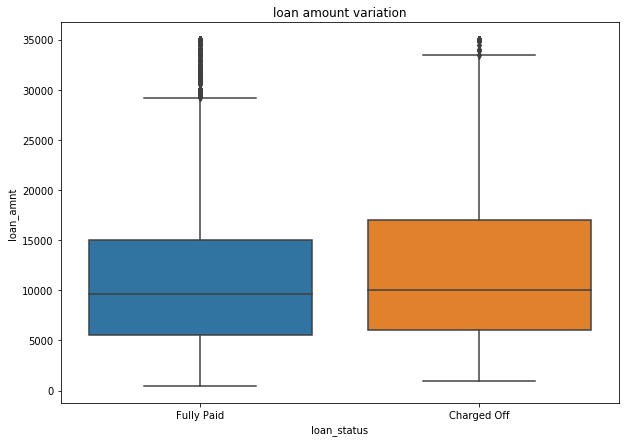

In [25]:
# loan amount variation
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='loan_amnt',data=loan)
plt.title('loan amount variation')
plt.show()

Loan amount variation for Charged off status is more than normal status.
Also, charged off consumers have slightly larger loan amounts. 

Funded amount variation

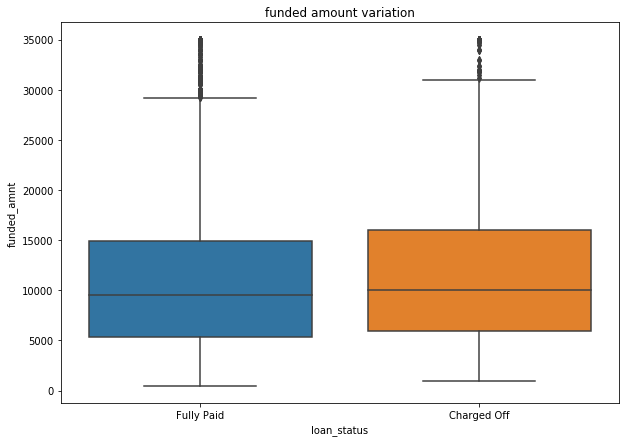

In [26]:
# funded amount variation
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='funded_amnt',data=loan)
plt.title('funded amount variation')
plt.show()

Funded amount variation for Charged off status is more than normal status.
Also, charged off consumers have slightly larger funded amounts. 

Term variation

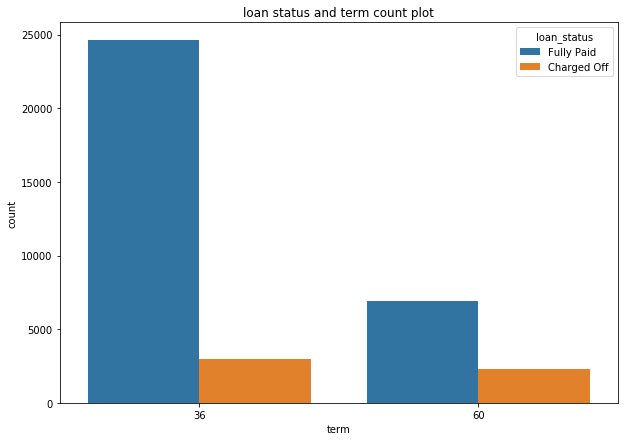

In [27]:
# term is not a useful feature as there are both status records for each term
plt.figure(figsize=(10,7))
sns.countplot(data=loan,x='term',hue='loan_status')
plt.title('loan status and term count plot')
plt.show()

Interest Rate variation

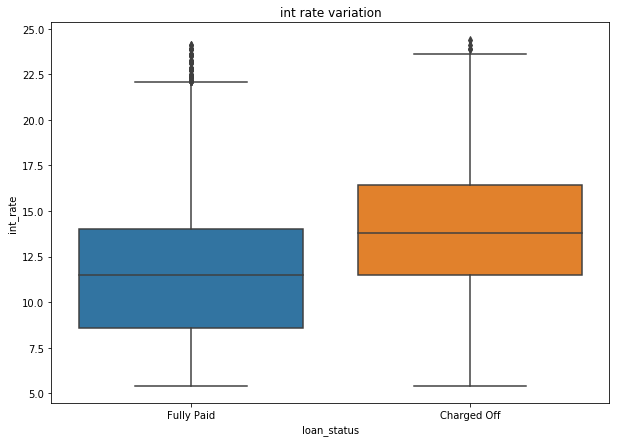

In [28]:
# int rate  variation
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='int_rate',data=loan)
plt.title('int rate variation')
plt.show()

In [29]:
# have a closer look @ int_rate
# For charged-off loans , the mean and median int rate is higher than normal status 
# so int_rate could e an important feature
print('Mean int rate',loan.groupby('loan_status')['int_rate'].mean())
print('*'*100)
print('median int rate',loan.groupby('loan_status')['int_rate'].median())
print('*'*100)
print('max int rate',loan.groupby('loan_status')['int_rate'].max())
print('*'*100)
print('min int rate',loan.groupby('loan_status')['int_rate'].min())

Mean int rate loan_status
Charged Off    13.925055
Fully Paid     11.659557
Name: int_rate, dtype: float64
****************************************************************************************************
median int rate loan_status
Charged Off    13.79
Fully Paid     11.49
Name: int_rate, dtype: float64
****************************************************************************************************
max int rate loan_status
Charged Off    24.40
Fully Paid     24.11
Name: int_rate, dtype: float64
****************************************************************************************************
min int rate loan_status
Charged Off    5.42
Fully Paid     5.42
Name: int_rate, dtype: float64


Interest rate variation seems useful for separating the classes.
Charged off consumers seem to have higher interest rates.

Installment variation

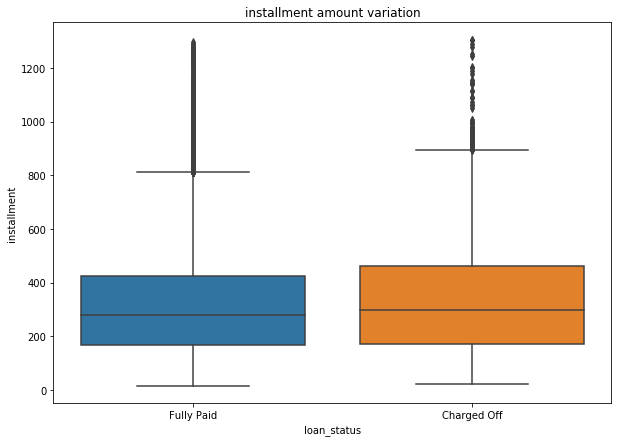

In [30]:
# installment variation  is close
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='installment',data=loan)
plt.title('installment amount variation')
plt.show()

In [31]:
# have a closer look @ installment
# For charged-off loans , the mean and median int rate is higher than normal status 
# so int_rate could e an important feature
print('Mean installment',loan.groupby('loan_status')['installment'].mean())
print('*'*100)
print('median installment',loan.groupby('loan_status')['installment'].median())
print('*'*100)
print('max installment',loan.groupby('loan_status')['installment'].max())
print('*'*100)
print('min installment',loan.groupby('loan_status')['installment'].min())

Mean installment loan_status
Charged Off    338.773802
Fully Paid     322.590782
Name: installment, dtype: float64
****************************************************************************************************
median installment loan_status
Charged Off    296.75
Fully Paid     278.15
Name: installment, dtype: float64
****************************************************************************************************
max installment loan_status
Charged Off    1305.19
Fully Paid     1295.21
Name: installment, dtype: float64
****************************************************************************************************
min installment loan_status
Charged Off    22.79
Fully Paid     16.08
Name: installment, dtype: float64


Installment amount variation also might be useful marginally for separating the two classes.
Charged Off consumers seem to have slightly higher installment amounts.

Grade

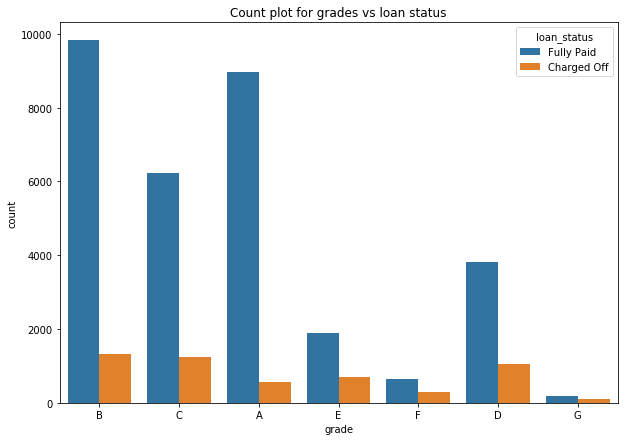

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(data=loan,x='grade',hue='loan_status')
plt.title('Count plot for grades vs loan status')
plt.show()

Grades B,C and D grade are having more charged off consumers than other grades.

Sub Grade

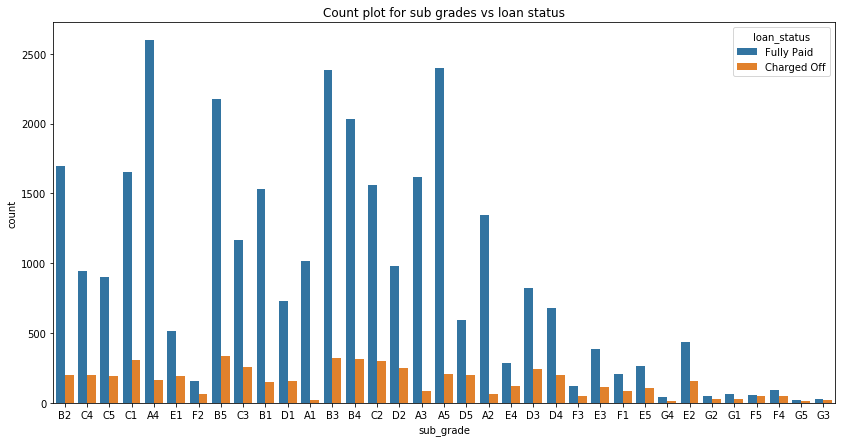

In [33]:
plt.figure(figsize=(14,7))
sns.countplot(data=loan,x='sub_grade',hue='loan_status')
plt.title('Count plot for sub grades vs loan status')
plt.show()

Charged Off consumers are more for B,C,D related sub grades

Employment length

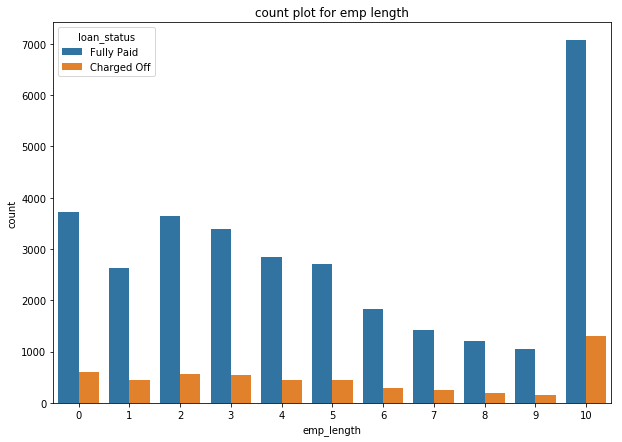

In [34]:
# emp_length is not a useful separable feature as there are all the lengths for each status
plt.figure(figsize=(10,7))
sns.countplot(data=loan,x='emp_length',hue='loan_status')
plt.title('count plot for emp length')
plt.show()

Number of Charged Off consumers shoots up after 10 years of employment.

Annual Income variation

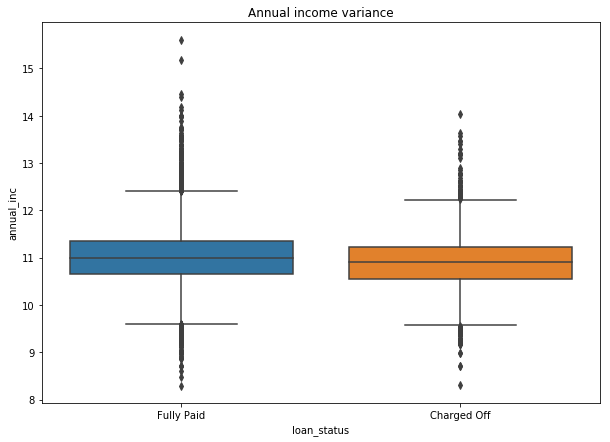

In [35]:
# annual income variation
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y=np.log(loan['annual_inc']),data=loan)
plt.title('Annual income variance')
plt.show()

In [36]:
# have a closer look @ annual income
# For charged-off loans , the mean,max and median annual_inc are smaller than normal status annual_inc 
# so annual_inc could be an important feature
print('Mean income',loan.groupby('loan_status')['annual_inc'].mean())
print('*'*100)
print('median income',loan.groupby('loan_status')['annual_inc'].median())
print('*'*100)
print('max income',loan.groupby('loan_status')['annual_inc'].max())
print('*'*100)
print('min income',loan.groupby('loan_status')['annual_inc'].min())

Mean income loan_status
Charged Off    63251.346322
Fully Paid     70467.031187
Name: annual_inc, dtype: float64
****************************************************************************************************
median income loan_status
Charged Off    54000.0
Fully Paid     60000.0
Name: annual_inc, dtype: float64
****************************************************************************************************
max income loan_status
Charged Off    1250000.0
Fully Paid     6000000.0
Name: annual_inc, dtype: float64
****************************************************************************************************
min income loan_status
Charged Off    4080.0
Fully Paid     4000.0
Name: annual_inc, dtype: float64


Annual income could be a useful feature for separating the two classes.
The annual Income for Charged Off consumers is usually les than the normal consumers.

Purpose variation

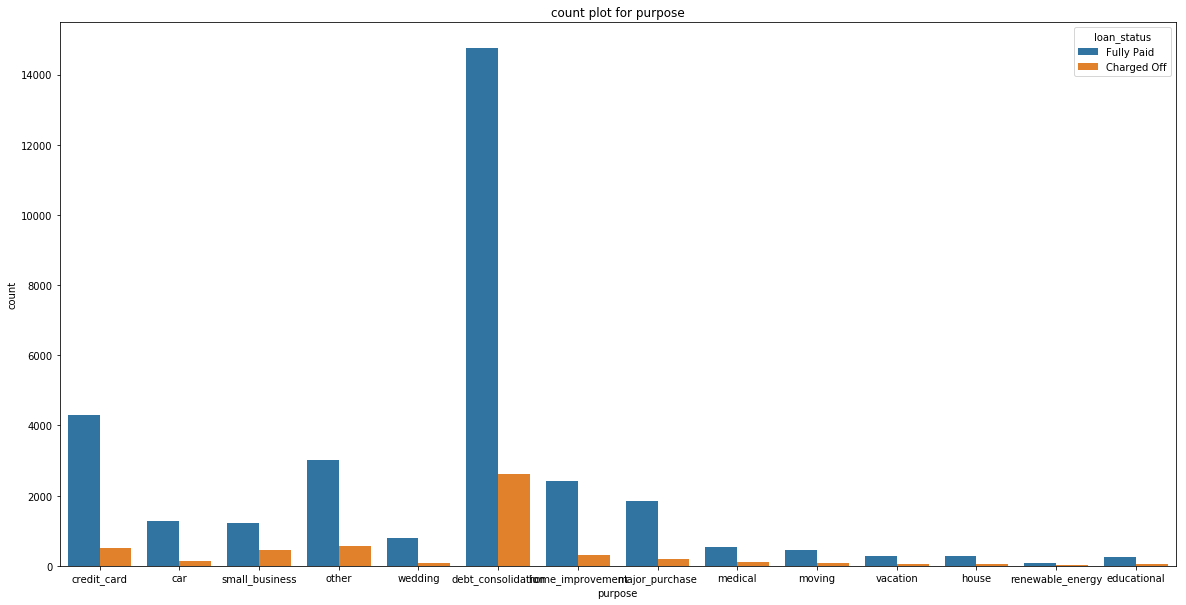

In [37]:
# purpose  is not a useful feature as there are all the values for each status
plt.figure(figsize=(20,10))
sns.countplot(data=loan,x='purpose',hue='loan_status')
plt.title('count plot for purpose')
plt.show()

Debt Consolidation has the highest no. of charged off consumers and consumers in general.

DTI variation ( Debt to income ratio)

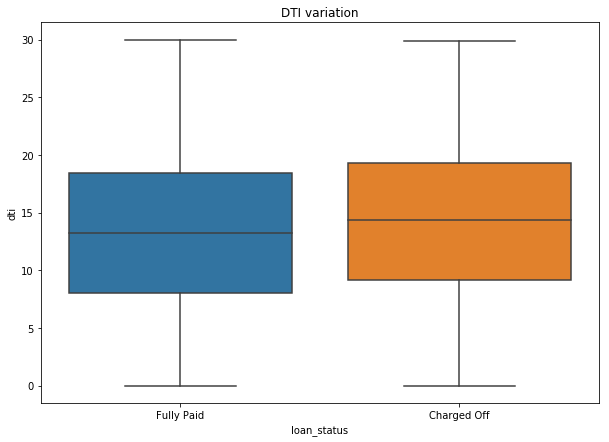

In [38]:
# dti variation
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='dti',data=loan)
plt.title('DTI variation')
plt.show()

In [39]:
# have a closer look @ dti
# dti could be important due to difference in statistics
print('Mean dti',loan.groupby('loan_status')['dti'].mean())
print('*'*100)
print('median dti',loan.groupby('loan_status')['dti'].median())
print('*'*100)
print('max dti',loan.groupby('loan_status')['dti'].max())
print('*'*100)
print('min dti',loan.groupby('loan_status')['dti'].min())

Mean dti loan_status
Charged Off    14.029187
Fully Paid     13.218524
Name: dti, dtype: float64
****************************************************************************************************
median dti loan_status
Charged Off    14.335
Fully Paid     13.260
Name: dti, dtype: float64
****************************************************************************************************
max dti loan_status
Charged Off    29.85
Fully Paid     29.99
Name: dti, dtype: float64
****************************************************************************************************
min dti loan_status
Charged Off    0.0
Fully Paid     0.0
Name: dti, dtype: float64


Debt to income ratio could be slightly helpful in separating the two classes.
Though the debt to income ratio of charged off consumers is comparable to other consumers, considering 
their lesser incomes, its a significant feature. Consumers with less income and more debt tend more to being charged off. 

mths_since_last_delinq variation

Delinq_2yrs variation

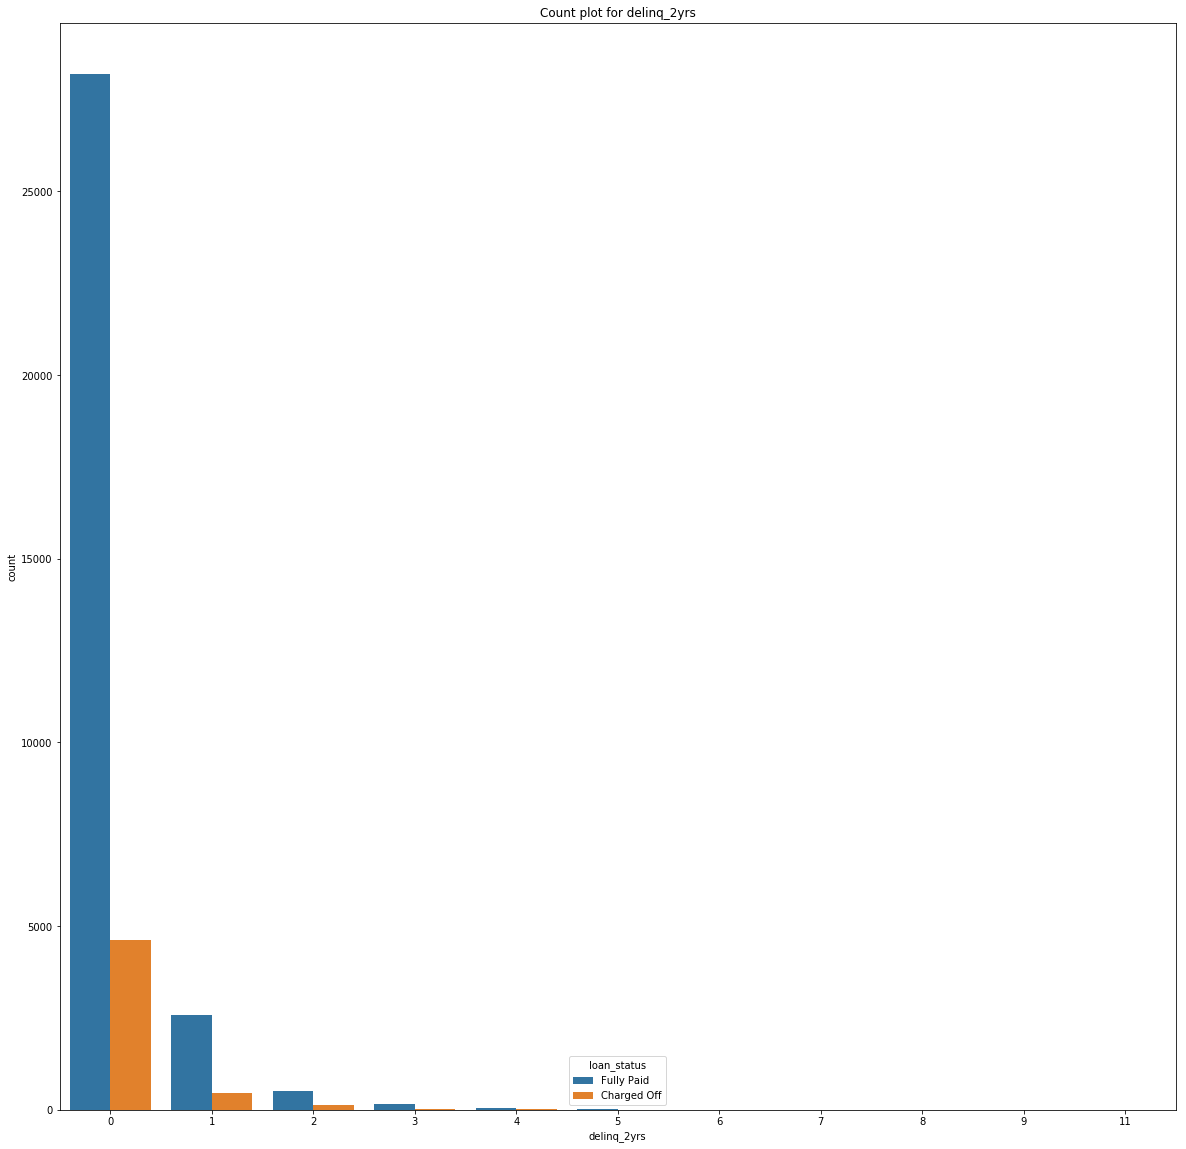

In [40]:
# delinq_2yrs might be a mrginally useful feature as customers no of delinquencies more than 8 are not 
#charged off as per our data 
plt.figure(figsize=(20,20))
sns.countplot(data=loan,x='delinq_2yrs',hue='loan_status')
plt.title('Count plot for delinq_2yrs')
plt.show()

inq_last_6mths variation ( No of inquiries in last 6 months)

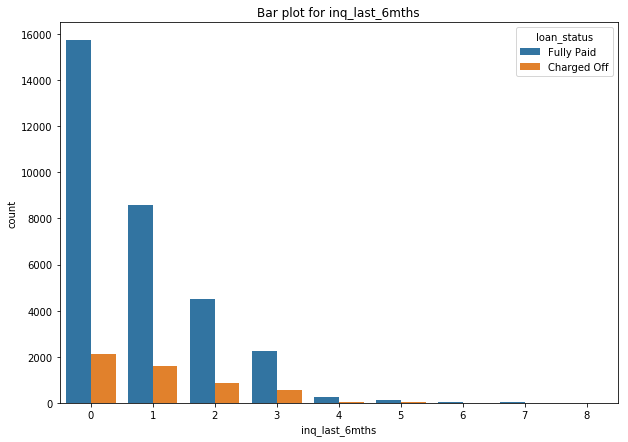

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(data=loan,x='inq_last_6mths',hue='loan_status')
plt.title('Bar plot for inq_last_6mths')
plt.show()

Lesser inquiries for charged off consumers surprisingly

Open_acc variation

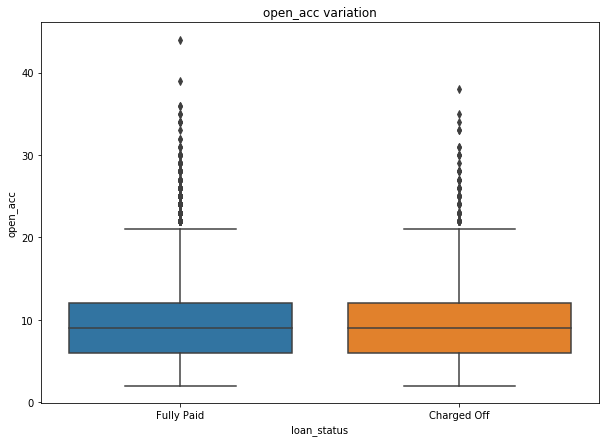

In [42]:
# open_acc is pretty close
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='open_acc',data=loan)
plt.title('open_acc variation')
plt.show()

Revol_util variation

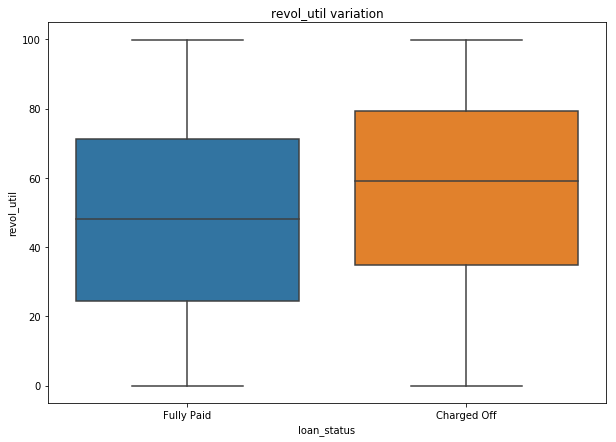

In [43]:
# revol_util is interesting
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='revol_util',data=loan)
plt.title('revol_util variation')
plt.show()

In [44]:
# have a closer look @ revol_util
# For charged-off loans , the mean and median dti are 1 point more than normal status annual_inc 
# so revol_util could be a marginally important feature
print('Mean revol_util',loan.groupby('loan_status')['revol_util'].mean())
print('*'*100)
print('median revol_util',loan.groupby('loan_status')['revol_util'].median())
print('*'*100)
print('max revol_util',loan.groupby('loan_status')['revol_util'].max())
print('*'*100)
print('min revol_util',loan.groupby('loan_status')['revol_util'].min())

Mean revol_util loan_status
Charged Off    55.912630
Fully Paid     47.837262
Name: revol_util, dtype: float64
****************************************************************************************************
median revol_util loan_status
Charged Off    59.0
Fully Paid     48.0
Name: revol_util, dtype: float64
****************************************************************************************************
max revol_util loan_status
Charged Off    99.9
Fully Paid     99.9
Name: revol_util, dtype: float64
****************************************************************************************************
min revol_util loan_status
Charged Off    0.0
Fully Paid     0.0
Name: revol_util, dtype: float64


Revolving balance utilization variation is higher for charged off than normal status.
Consumers using more of the revolving credit tend to be riskier.

Revol_bal variation

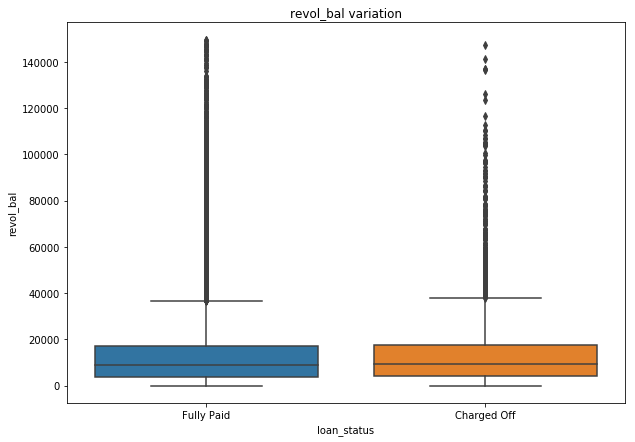

In [45]:
# revol_bal is interesting
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='revol_bal',data=loan)
plt.title('revol_bal variation')
plt.show()

Total_acc variation

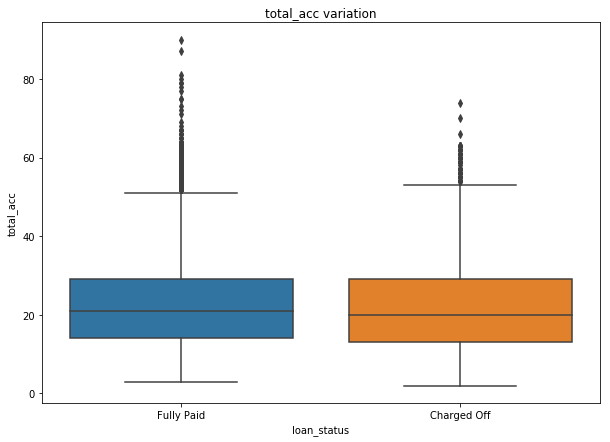

In [46]:
# total_acc variation
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='total_acc',data=loan)
plt.title('total_acc variation')
plt.show()

In [47]:
# have a closer look @ total_acc
# For charged-off loans , the mean and median total_acc are less than normal status total_acc 
# so total_acc could be a marginally important feature
print('Mean total_acc',loan.groupby('loan_status')['total_acc'].mean())
print('*'*100)
print('median total_acc',loan.groupby('loan_status')['total_acc'].median())
print('*'*100)
print('max total_acc',loan.groupby('loan_status')['total_acc'].max())
print('*'*100)
print('min total_acc',loan.groupby('loan_status')['total_acc'].min())

Mean total_acc loan_status
Charged Off    21.586403
Fully Paid     22.246591
Name: total_acc, dtype: float64
****************************************************************************************************
median total_acc loan_status
Charged Off    20
Fully Paid     21
Name: total_acc, dtype: int64
****************************************************************************************************
max total_acc loan_status
Charged Off    74
Fully Paid     90
Name: total_acc, dtype: int64
****************************************************************************************************
min total_acc loan_status
Charged Off    2
Fully Paid     3
Name: total_acc, dtype: int64


Total Acc variation across both loan statuses seems marginally helpful for separating the classes.

Total Payment variation

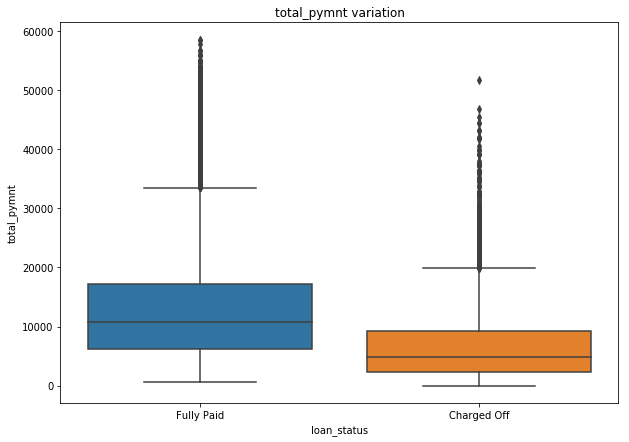

In [48]:
# total_pymnt is interesting
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='total_pymnt',data=loan)
plt.title('total_pymnt variation')
plt.show()

In [49]:
# have a closer look @ total_pymnt
# For charged-off loans , the mean and median total_pymnt are less than normal status total_pymnt 
# so total_pymnt could be a marginally important feature
print('Mean total_pymnt',loan.groupby('loan_status')['total_pymnt'].mean())
print('*'*100)
print('median total_pymnt',loan.groupby('loan_status')['total_pymnt'].median())
print('*'*100)
print('max total_pymnt',loan.groupby('loan_status')['total_pymnt'].max())
print('*'*100)
print('min total_pymnt',loan.groupby('loan_status')['total_pymnt'].min())

Mean total_pymnt loan_status
Charged Off     6920.653627
Fully Paid     12848.986209
Name: total_pymnt, dtype: float64
****************************************************************************************************
median total_pymnt loan_status
Charged Off     4892.530000
Fully Paid     10811.721125
Name: total_pymnt, dtype: float64
****************************************************************************************************
max total_pymnt loan_status
Charged Off    51745.45000
Fully Paid     58563.67993
Name: total_pymnt, dtype: float64
****************************************************************************************************
min total_pymnt loan_status
Charged Off      0.00000
Fully Paid     578.76814
Name: total_pymnt, dtype: float64


Total payment variation could be significant for separating both classes.
Charged off consumers have significantly lower total payment amount.

Total_rec_principal variation (principal amount received till date)

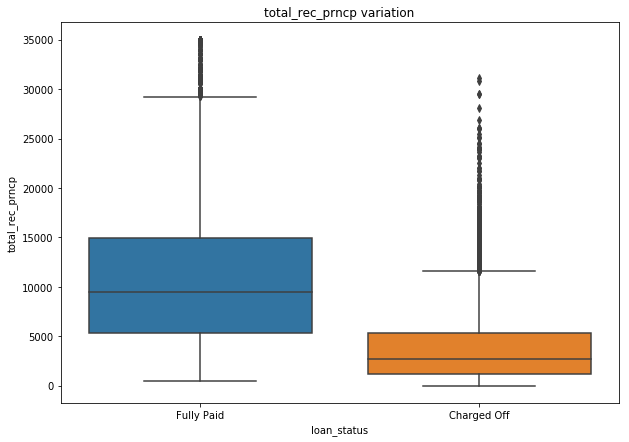

In [50]:
# total_rec_prncp is interesting
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='total_rec_prncp',data=loan)
plt.title('total_rec_prncp variation')
plt.show()

In [51]:
# have a closer look @ total_rec_prncp
# For charged-off loans , the mean and median total_rec_prncp are less than normal status total_rec_prncp 
# so total_rec_prncp could be a marginally important feature
print('Mean total_rec_prncp',loan.groupby('loan_status')['total_rec_prncp'].mean())
print('*'*100)
print('median total_rec_prncp',loan.groupby('loan_status')['total_rec_prncp'].median())
print('*'*100)
print('max total_rec_prncp',loan.groupby('loan_status')['total_rec_prncp'].max())
print('*'*100)
print('min total_rec_prncp',loan.groupby('loan_status')['total_rec_prncp'].min())

Mean total_rec_prncp loan_status
Charged Off     3988.778084
Fully Paid     10711.913100
Name: total_rec_prncp, dtype: float64
****************************************************************************************************
median total_rec_prncp loan_status
Charged Off    2739.88
Fully Paid     9500.00
Name: total_rec_prncp, dtype: float64
****************************************************************************************************
max total_rec_prncp loan_status
Charged Off    31115.81
Fully Paid     35000.02
Name: total_rec_prncp, dtype: float64
****************************************************************************************************
min total_rec_prncp loan_status
Charged Off      0.0
Fully Paid     500.0
Name: total_rec_prncp, dtype: float64


Total recovered principal variation could be significant for separating both classes.
Total recovered principal is lower for the charged off consumers.

Total_rec_int variation ( interest received till date)

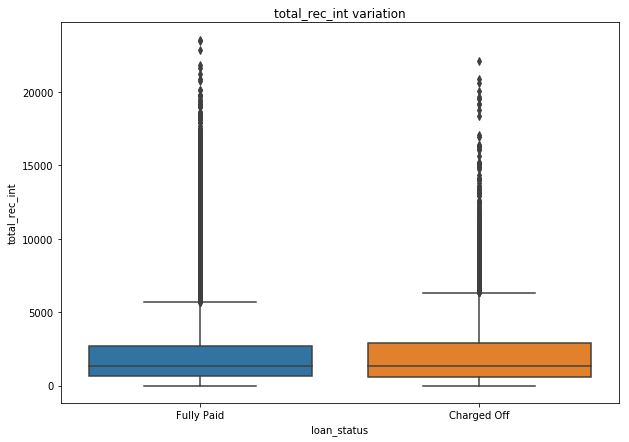

In [52]:
# total_rec_int is interesting
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='total_rec_int',data=loan)
plt.title('total_rec_int variation')
plt.show()

In [53]:
# have a closer look @ total_rec_int
# For charged-off loans , the mean and median total_rec_int are less than normal status total_rec_int 
# so total_rec_prncp could be a marginally important feature
print('Mean total_rec_int',loan.groupby('loan_status')['total_rec_int'].mean())
print('*'*100)
print('median total_rec_int',loan.groupby('loan_status')['total_rec_int'].median())
print('*'*100)
print('max total_rec_int',loan.groupby('loan_status')['total_rec_int'].max())
print('*'*100)
print('min total_rec_int',loan.groupby('loan_status')['total_rec_int'].min())

Mean total_rec_int loan_status
Charged Off    2240.515285
Fully Paid     2136.225244
Name: total_rec_int, dtype: float64
****************************************************************************************************
median total_rec_int loan_status
Charged Off    1325.990
Fully Paid     1326.185
Name: total_rec_int, dtype: float64
****************************************************************************************************
max total_rec_int loan_status
Charged Off    22122.30
Fully Paid     23563.68
Name: total_rec_int, dtype: float64
****************************************************************************************************
min total_rec_int loan_status
Charged Off    0.00
Fully Paid     6.22
Name: total_rec_int, dtype: float64


Total recovered interest variation could be significant for separating both classes

Total_rec_late_fee variation

In [54]:
# have a closer look @ total_rec_late_fee 
# For charged-off loans , the mean and max total_rec_late_fee  are more than normal status total_rec_late_fee  
# so total_rec_late_fee  could be a marginally important feature
print('Mean total_rec_late_fee ',loan.groupby('loan_status')['total_rec_late_fee'].mean())
print('*'*100)
print('median total_rec_late_fee ',loan.groupby('loan_status')['total_rec_late_fee'].median())
print('*'*100)
print('max total_rec_late_fee ',loan.groupby('loan_status')['total_rec_late_fee'].max())
print('*'*100)
print('min total_rec_late_fee ',loan.groupby('loan_status')['total_rec_late_fee'].min())

Mean total_rec_late_fee  loan_status
Charged Off    4.275972
Fully Paid     0.847972
Name: total_rec_late_fee, dtype: float64
****************************************************************************************************
median total_rec_late_fee  loan_status
Charged Off    0.0
Fully Paid     0.0
Name: total_rec_late_fee, dtype: float64
****************************************************************************************************
max total_rec_late_fee  loan_status
Charged Off    180.20
Fully Paid     165.69
Name: total_rec_late_fee, dtype: float64
****************************************************************************************************
min total_rec_late_fee  loan_status
Charged Off    0.0
Fully Paid     0.0
Name: total_rec_late_fee, dtype: float64


Total late fees recovered variation could be significant for separating both classes

## As per Univariate analysis, below features seem helpful in predicting whether the loan could be charged off or not:-
<br/>

<li>1. int_rate</li>
<li>2. annual_inc</li>
<li>3. delinq_2yrs</li>
<li>4. dti</li>
<li>5. total_paymnt</li>
<li>6. total_rec_prncp</li>
<li>7. total_rec_int</li>
<li>8. total_acc</li>
<li>9. revol_util</li>
<li>10. total_rec_int</li>
<li>11. loan amount </li>
<li>12. total_rec_int</li>

Data distribution:-

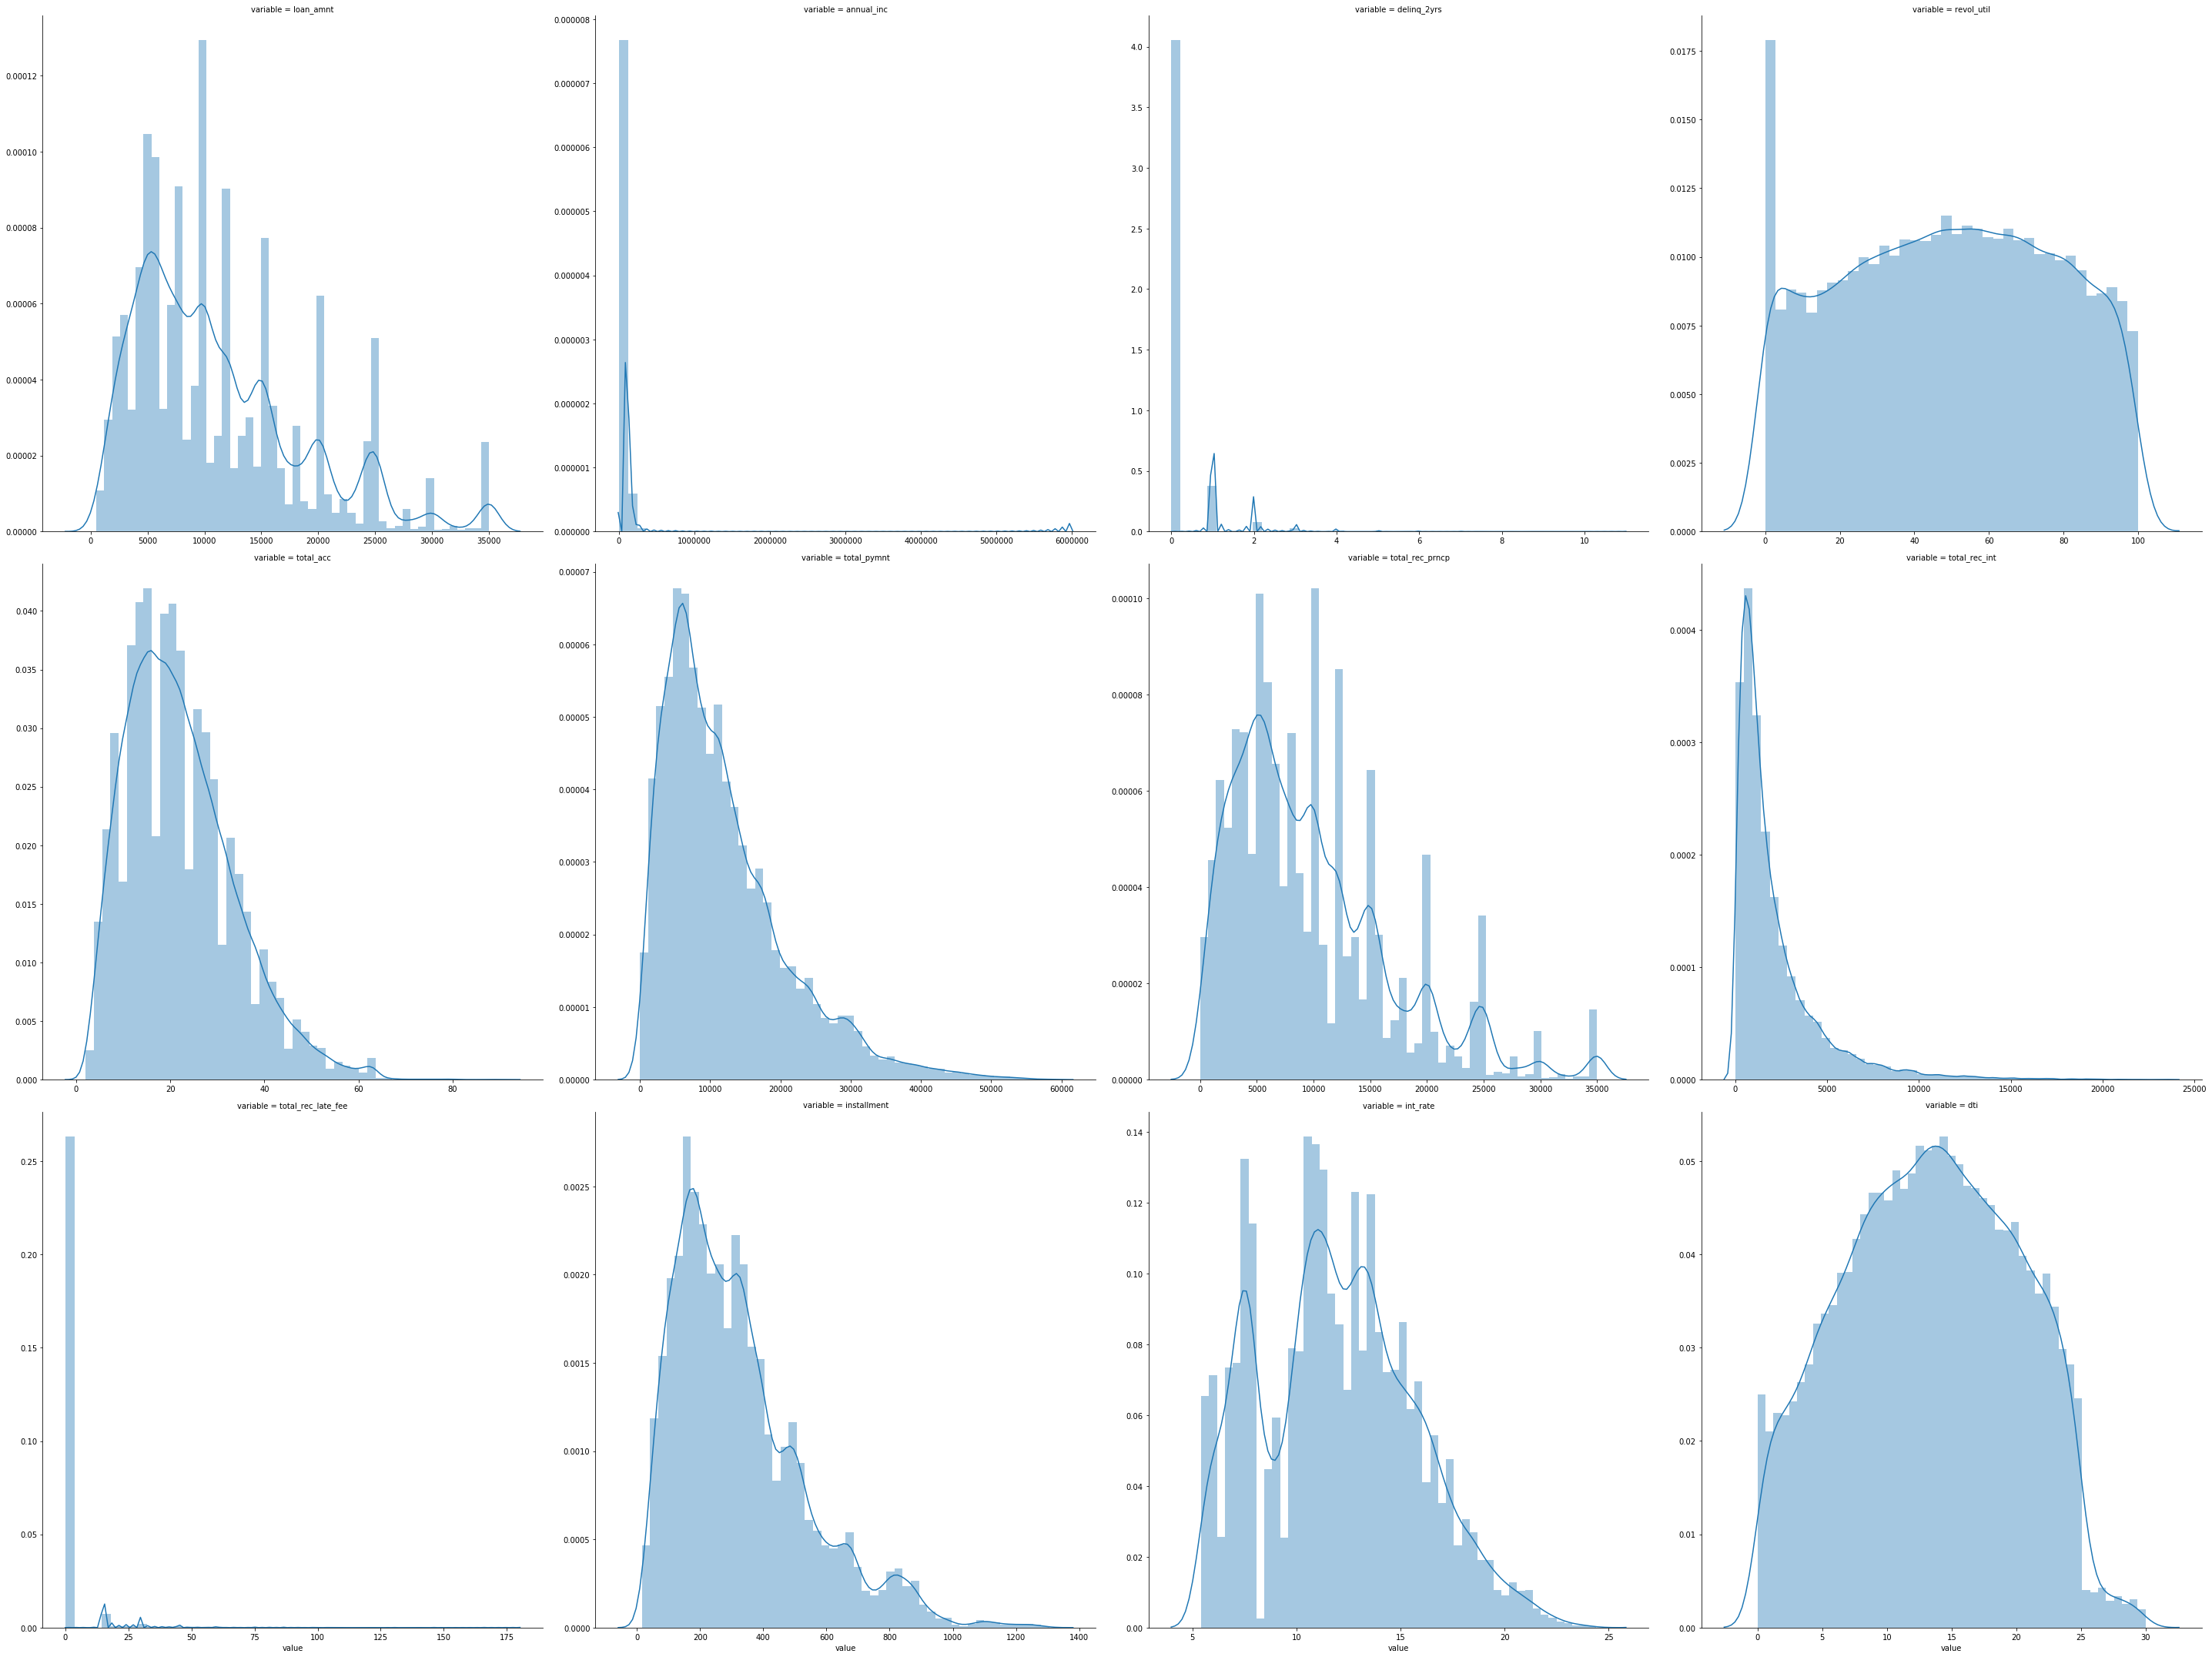

In [55]:
melted = pd.melt(loan,value_vars=['loan_amnt','annual_inc','delinq_2yrs','revol_util','total_acc','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','installment','int_rate','dti'])
f = sns.FacetGrid(melted,col='variable',sharex=False,sharey=False,col_wrap=4,size=10)
g = f.map(sns.distplot,'value')

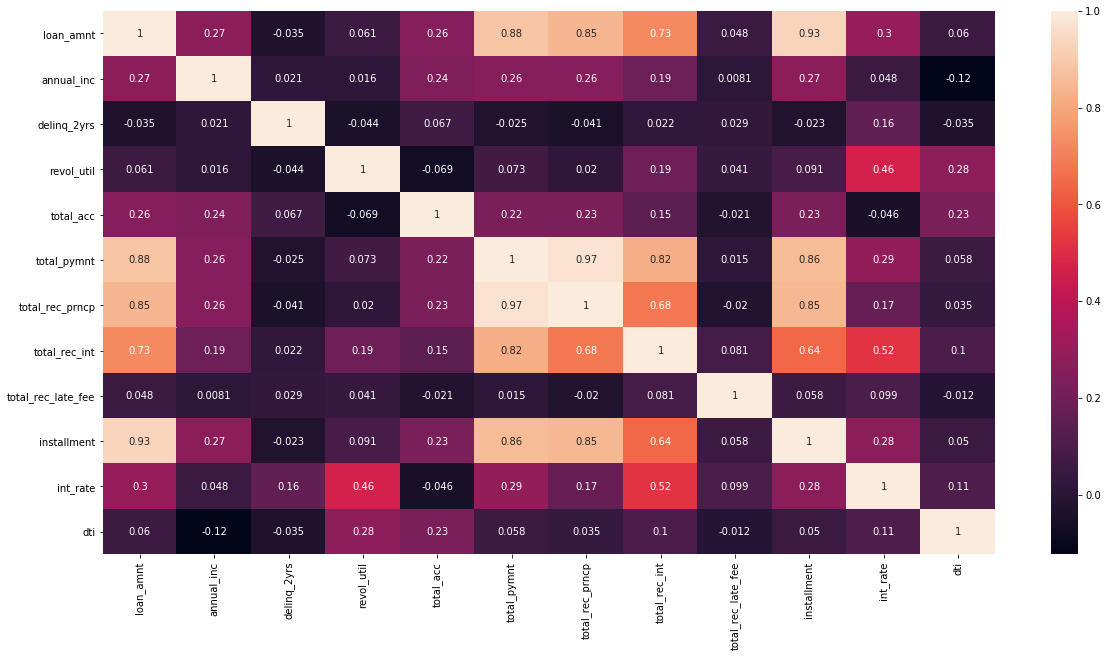

In [56]:
#correlation between variables
imp_features = loan[['loan_amnt','annual_inc','delinq_2yrs','revol_util','total_acc','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','installment','int_rate','dti']]
plt.figure(figsize=(20,10))
sns.heatmap(imp_features.corr(),annot=True)
plt.show()

loan_amount and installment , recovered principal and total payment are highly correlated

## Bivariate Analysis

**Lets load the data file and start fresh for bivariate analysis after cleaning the data**

-Now lets move to convert the columns in to their specific for analysis.  
* last_pymnt_d, last_credit_pull_d, issue_d, earliest_cr_line are of object type which needs to be converted in to date type.

In [57]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

-There are some columns which can be converted to numeric columns for analysis.
* int-rate, term and revol-util are some probable columns as per our observation

In [58]:
print(loan[['int_rate', 'term', 'revol_util']].info())
loan[['int_rate', 'term', 'revol_util']].head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 3 columns):
int_rate      36800 non-null float64
term          36800 non-null int64
revol_util    36800 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.4 MB
None


,int_rate,term,revol_util
0,10.65,36,83.7
1,15.27,60,9.4
2,15.96,36,98.5
3,13.49,36,21.0
5,7.90,36,28.3
6,15.96,60,85.6
7,18.64,36,87.5
8,21.28,60,32.6
9,12.69,60,36.5
10,14.65,60,20.6


'int_rate', 'term' ,'emp_length'and 'revol_util' are object type which can be converted in to numeric type, let's convert them.

In [59]:
#making sure there are only 36 and 60 months as values in term column
loan.term.value_counts()

36    27546
60     9254
Name: term, dtype: int64

In [60]:
loan.emp_length = loan['emp_length'].astype('int')

In [61]:
print(loan[['int_rate', 'term', 'revol_util','emp_length']].info())
loan[['int_rate', 'term', 'revol_util', 'emp_length']].head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 4 columns):
int_rate      36800 non-null float64
term          36800 non-null int64
revol_util    36800 non-null float64
emp_length    36800 non-null int32
dtypes: float64(2), int32(1), int64(1)
memory usage: 2.5 MB
None


,int_rate,term,revol_util,emp_length
0,10.65,36,83.7,10
1,15.27,60,9.4,0
2,15.96,36,98.5,10
3,13.49,36,21.0,10
5,7.90,36,28.3,3
6,15.96,60,85.6,8
7,18.64,36,87.5,9
8,21.28,60,32.6,4
9,12.69,60,36.5,0
10,14.65,60,20.6,5


Check the precision of float columns, can be round off to 2 digits.

In [62]:
#fetching all float columns for checking precision, total_pymnt is the oly column with precision more than 2
loan.loc[:,loan.dtypes=='float'].tail()
loan.total_pymnt=round(loan['total_pymnt'], 2)

## **Segmented Analysis**

Segmented Analysis for Loan Data Set to find components w.r.t Loan Defaultors

Now with Segmeneted Ananlysis we have to find how much % categoriacal data affect the case of Loan Defaultors
For the Analysis we will study pattern for the below Segments and by what  %  they leads to Loan Defaultors 
1. Loan amount Value w.r.t Loan Status
2. Term w.r.t to Loan Status
3. Interest Rate given(at what % the rate was given)
4. Annual Income of borrower
5. Grade for the Loan given by LC
6. Sub Grabe for the Loan given by LC
7. Home Ownership of Loan Borrower
8. Income Source Status
9. Purpose of the Loan



Lets Start
1. Loan Amount w.r.t each Loan Status
This will tell that how much % of Loan Amount as Total  being called as Loan Paid, Charged Off and Current

In [63]:
# Number of Cases vs Loan Status
ln_amnt_df=loan.groupby(['loan_status'])['loan_amnt'].agg([('# of Cases','count'),('% of Total Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))])
ln_amnt_df.head()

,# of Cases,% of Total Contribution
loan_status,,
Charged Off,5266,14.31
Fully Paid,31534,85.69


In [64]:
# Now lets see how the amount given to borrower can effect to Loan being called as Charged Off
# Lets distribute the Loan Amount into Loan Amount  Bucket to carry out Analysis
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], [0, 2500, 5000, 10000, 15000, 20000, 25000,np.inf], labels=['<2500', '2500-5000', '5000-10000','10000-15000','15000-20000','20000-25000','25000+'])
ln_amnt_bin_df=pd.DataFrame(loan.groupby(['loan_amnt_bin','loan_status'])['loan_amnt'].agg([('# of Cases ','count'),('%Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))]))
ln_amnt_bin_df

# of Cases   %Contribution
loan_amnt_bin loan_status                            
<2500         Charged Off          327           0.89
              Fully Paid          1990           5.41
2500-5000     Charged Off          859           2.33
              Fully Paid          5647          15.35
5000-10000    Charged Off         1537           4.18
              Fully Paid         10653          28.95
10000-15000   Charged Off          998           2.71
              Fully Paid          6435          17.49
15000-20000   Charged Off          719           1.95
              Fully Paid          3478           9.45
20000-25000   Charged Off          510           1.39
              Fully Paid          2235           6.07
25000+        Charged Off          316           0.86
              Fully Paid          1096           2.98

Lets Study the result with the help of Analysis

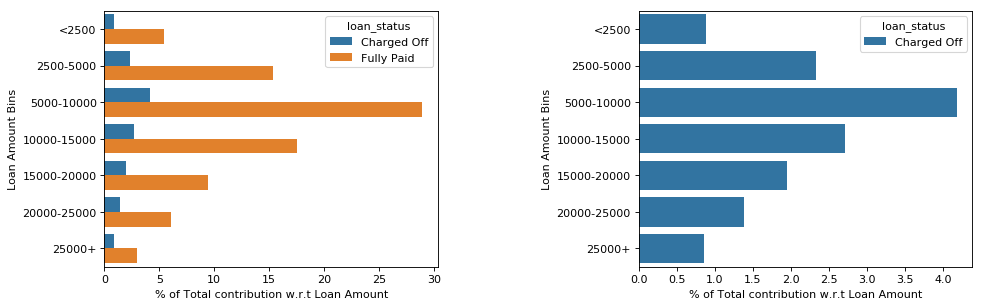

In [65]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
# subplot 1: Overall Spilt of Loan Amount into various Loan Status
plt.subplot(2, 2, 1)
loan_by_amnt_bin=loan.groupby(['loan_amnt_bin','loan_status'])
amnt_bins=round(100*(loan_by_amnt_bin['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Loan Amount','loan_amnt_bin' : 'Loan Amount Bins','loan_status':'loan_status'})
sns.barplot(y=amnt_bins['Loan Amount Bins'], x=amnt_bins['% of Total contribution w.r.t Loan Amount'], hue=amnt_bins['loan_status'])

# subplot 2: % of Defaultors w.r.t Loan Amount
plt.subplot(2, 2, 2)
charged_df=loan.loc[(loan.loan_status=='Charged Off'),:].groupby(['loan_amnt_bin','loan_status'])
amnt_bin_df=round(100*(charged_df['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Loan Amount','loan_amnt_bin' : 'Loan Amount Bins','loan_status':'loan_status'})
sns.barplot(y=amnt_bin_df['Loan Amount Bins'], x=amnt_bin_df['% of Total contribution w.r.t Loan Amount'], hue=amnt_bin_df['loan_status'])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.5)
plt.show()

We can't draw direct conclusion on Loan Amount however with the data we can say the Loan Defaultor recieve max % while the loan amount  is between 5000-10000 while very less chances if the loan Amount values is above 25K

In [66]:
# Term w.r.t to Loan Status, Lets see for Loan Defaultors does Term make any effect.
term_df=pd.DataFrame(loan.groupby(['term','loan_status'])['loan_amnt'].agg([('# of Cases ','count'),('%Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))]))
term_df.head()

# of Cases   %Contribution
term loan_status                            
36   Charged Off         2943           8.00
     Fully Paid         24603          66.86
60   Charged Off         2323           6.31
     Fully Paid          6931          18.83

As per above % 36Months period of Term have greater Number of Cases for Defaulters than 60 Months Period

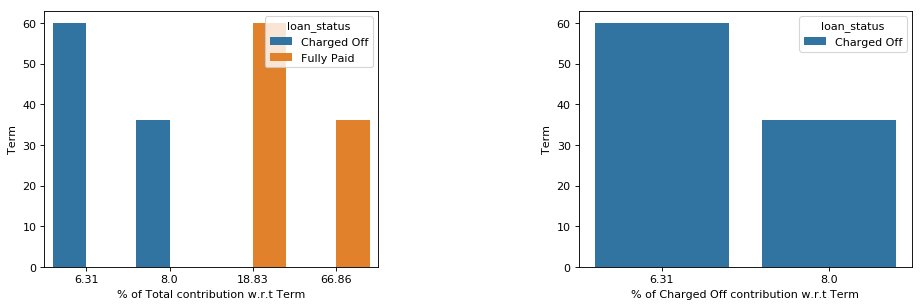

In [67]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
# subplot 1: Overall Split on the basis of Loan Term
plt.subplot(2, 2, 1)
loan_by_term=loan.groupby(['term','loan_status'])
loan_term=round(100*(loan_by_term['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Term','term' : 'Term','loan_status':'loan_status'})
sns.barplot(y=loan_term['Term'], x=loan_term['% of Total contribution w.r.t Term'], hue=loan_term['loan_status'])
 
# subplot 2: Loan Term % for Loan Defaultors
plt.subplot(2, 2, 2)
charged_term_df=loan.loc[(loan.loan_status=='Charged Off'),:].groupby(['term','loan_status'])
charged_term=round(100*(charged_term_df['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Charged Off contribution w.r.t Term','term' : 'Term','loan_status':'loan_status'})
sns.barplot(y=charged_term['Term'], x=charged_term['% of Charged Off contribution w.r.t Term'], hue=charged_term['loan_status'])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.5)
plt.show()

In [68]:
# Now we see how interest rate have drawn effect on Loan Deafultors
#Interest Rate given(at what % the rate was given)
# Lets first Convert the Object to Float and make the buckets for Interest Rat for Grouping the data in the rate intervals
loan['int_rate_bin'] = pd.cut(loan['int_rate'], [0, 5, 10, 15, 20,np.inf], labels=['0-5%','5-10%','10-15%','15-20%','20%+'])
inc_rate_df=loan.groupby(['int_rate_bin','loan_status'])['loan_amnt'].agg([('# of Cases ','count'),('%Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))])
inc_rate_df

# of Cases   %Contribution
int_rate_bin loan_status                            
5-10%        Charged Off          736           2.00
             Fully Paid         10809          29.37
10-15%       Charged Off         2512           6.83
             Fully Paid         14963          40.66
15-20%       Charged Off         1729           4.70
             Fully Paid          5293          14.38
20%+         Charged Off          289           0.79
             Fully Paid           469           1.27

Lets See the the pattern on Bar plot for Overall and Defaultors

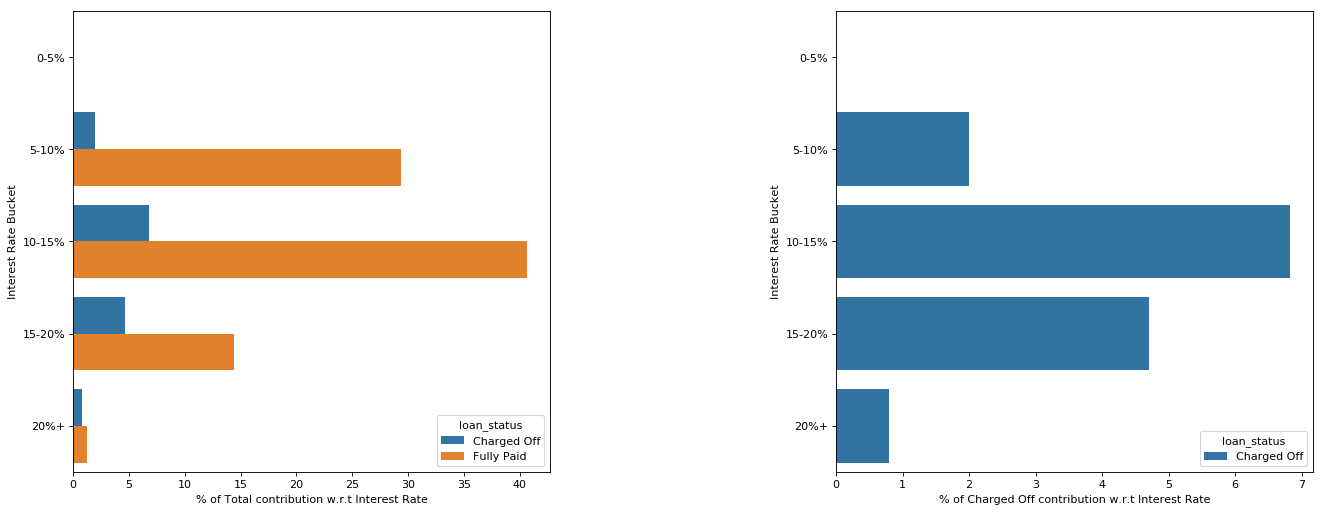

In [69]:
plt.figure(num=None, figsize=(20, 18), dpi=80, facecolor='w', edgecolor='k')
# subplot 1: Overall Split on the basis of Loan Rate Term
plt.subplot(2, 2, 1)
loan_by_int_rate_bin=loan.groupby(['int_rate_bin','loan_status'])
rate_df=round(100*(loan_by_int_rate_bin['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Interest Rate','int_rate_bin' : 'Interest Rate Bucket','loan_status':'loan_status'})
sns.barplot(y=rate_df['Interest Rate Bucket'], x=rate_df['% of Total contribution w.r.t Interest Rate'], hue=rate_df['loan_status'])
 
# subplot 2:  % of Loan Defaultors for the Each Rate Bucket
plt.subplot(2, 2, 2)
charged_rate_df=loan.loc[(loan.loan_status=='Charged Off'),:].groupby(['int_rate_bin','loan_status'])
charged_Rate=round(100*(charged_rate_df['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Charged Off contribution w.r.t Interest Rate','int_rate_bin' : 'Interest Rate Bucket','loan_status':'loan_status'})
sns.barplot(y=charged_Rate['Interest Rate Bucket'], x=charged_Rate['% of Charged Off contribution w.r.t Interest Rate'], hue=charged_Rate['loan_status'])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.5)
plt.show()

This show that if the interest rate is between 10-15% then there is maximum number of chances of borrower being Defaultor

Now we will draw consequences of Annual Income of borrower vs chnaces of being defaultor

In [70]:
#lets also convert the Annual income in Buckets

loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], [0, 10000, 50000, 100000, 150000, 200000, 300000, 400000,500000,600000,700000,800000,900000,1000000], labels=['<10000', '10K-50K', '50K-100K','100K-150K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K','800K-900K','900K-1M','1M+'])
anul_inc_df=loan.groupby(['annual_inc_bin','loan_status'])['loan_amnt'].agg([('# of Cases ','count'),('%Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))])
anul_inc_df

# of Cases   %Contribution
annual_inc_bin loan_status                            
<10000         Charged Off           15           0.04
               Fully Paid            49           0.13
10K-50K        Charged Off         2363           6.42
               Fully Paid         11895          32.32
50K-100K       Charged Off         2317           6.30
               Fully Paid         14829          40.30
100K-150K      Charged Off          414           1.12
               Fully Paid          3477           9.45
200K-300K      Charged Off          101           0.27
               Fully Paid           793           2.15
300K-400K      Charged Off           37           0.10
               Fully Paid           348           0.95
400K-500K      Charged Off            8           0.02
               Fully Paid            71           0.19
500K-600K      Charged Off            1           0.00
               Fully Paid            21           0.06
600K-700K      Charged Off            4           0.01
               Fully Paid            12           0.03
700K-800K      Charged Off            2           0.01
               Fully Paid             6           0.02
800K-900K      Charged Off            2           0.01
               Fully Paid            14           0.04
900K-1M        Charged Off            1           0.00
               Fully Paid             6           0.02
1M+            Fully Paid             1           0.00

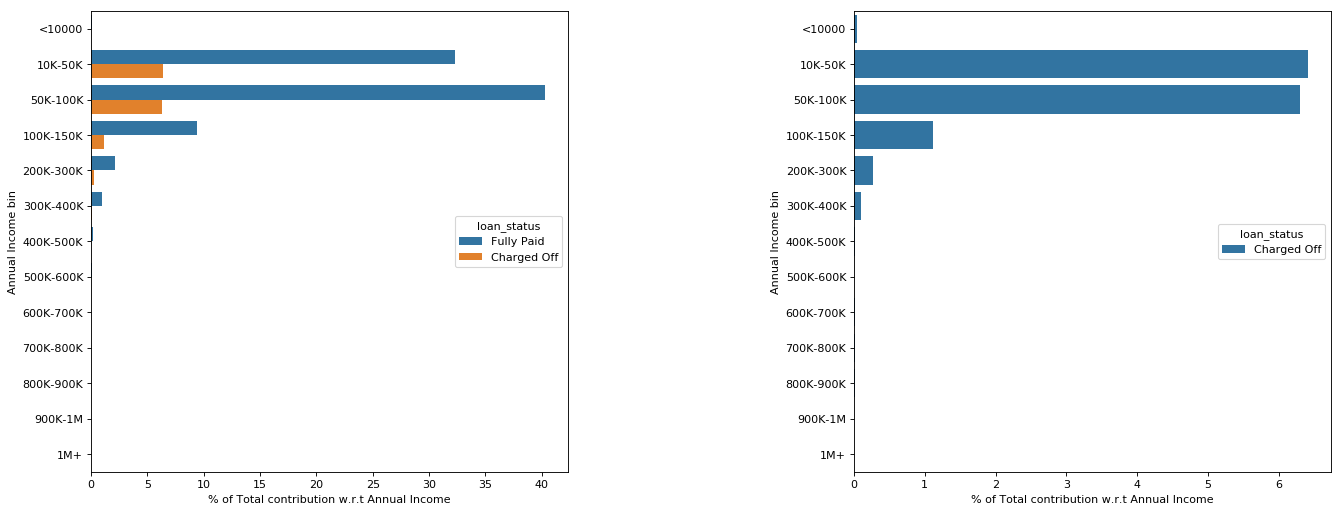

In [71]:
plt.figure(num=None, figsize=(20, 18), dpi=80, facecolor='w', edgecolor='k')
# subplot 1: Overall Split of Loan Status vs Borrower's Annual Income
plt.subplot(2, 2, 1)
loan_by_annual_inc_bin=loan.groupby(['annual_inc_bin','loan_status'])
inc_df=round(100*(loan_by_annual_inc_bin['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Annual Income','annual_inc_bin' : 'Annual Income bin','loan_status':'loan_status'}).sort_values(by=['Annual Income bin','% of Total contribution w.r.t Annual Income'],ascending= [True,False])
sns.barplot(y=inc_df['Annual Income bin'], x=inc_df['% of Total contribution w.r.t Annual Income'], hue=inc_df['loan_status'])

# subplot 2: % of Defaultors w.r.t annual Income
plt.subplot(2, 2, 2)
charged_inc_df=loan.loc[(loan.loan_status=='Charged Off'),:].groupby(['annual_inc_bin','loan_status'])
annl_inc_bin_df=round(100*(charged_inc_df['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Annual Income','annual_inc_bin' : 'Annual Income bin','loan_status':'loan_status'})
sns.barplot(y=annl_inc_bin_df['Annual Income bin'], x=annl_inc_bin_df['% of Total contribution w.r.t Annual Income'], hue=annl_inc_bin_df['loan_status'])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.5)
plt.show()

As the above draw we can say if the borrowers income is between 10K-50K and 50K-100K have recived highest % of Defaultor cases

Lets check the Grade given by LC impacted Loan Status

In [72]:
# Grade for the Loan given by LC vs Loan Status
grade_df=pd.DataFrame(loan.groupby(['grade','loan_status'])['loan_amnt'].agg([('# of Cases ','count'),('%Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))]))
grade_df.head(15)

# of Cases   %Contribution
grade loan_status                            
A     Charged Off          552           1.50
      Fully Paid          8966          24.36
B     Charged Off         1326           3.60
      Fully Paid          9823          26.69
C     Charged Off         1251           3.40
      Fully Paid          6223          16.91
D     Charged Off         1049           2.85
      Fully Paid          3803          10.33
E     Charged Off          686           1.86
      Fully Paid          1888           5.13
F     Charged Off          304           0.83
      Fully Paid           635           1.73
G     Charged Off           98           0.27
      Fully Paid           196           0.53

Draw the Analysis for Grade vs Loan Status

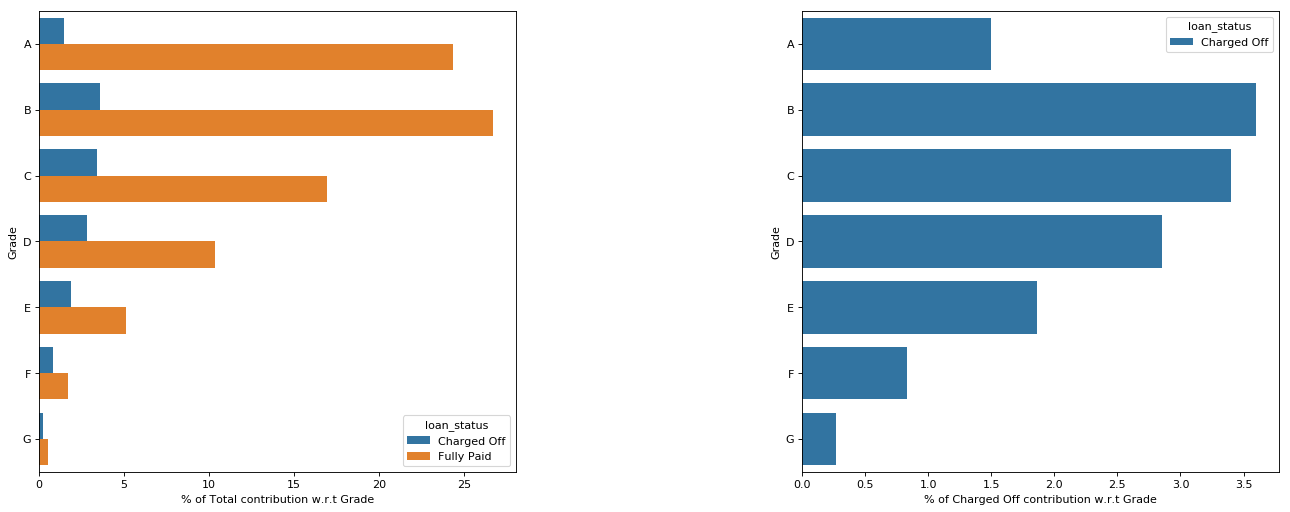

In [73]:
plt.figure(num=None, figsize=(20, 18), dpi=80, facecolor='w', edgecolor='k')
# subplot 1: Overall Split of Grades Among Loan Status
plt.subplot(2, 2, 1)
loan_by_grade=loan.groupby(['grade','loan_status'])
loan_grade=round(100*(loan_by_grade['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Grade','grade' : 'Grade','loan_status':'loan_status'})
sns.barplot(y=loan_grade['Grade'], x=loan_grade['% of Total contribution w.r.t Grade'], hue=loan_grade['loan_status'])
 
# subplot 2: % Defaultors as per each Grade
plt.subplot(2, 2, 2)
charged_grade_df=loan.loc[(loan.loan_status=='Charged Off'),:].groupby(['grade','loan_status'])
charged_grade=round(100*(charged_grade_df['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Charged Off contribution w.r.t Grade','grade' : 'Grade','loan_status':'loan_status'})
sns.barplot(y=charged_grade['Grade'], x=charged_grade['% of Charged Off contribution w.r.t Grade'], hue=charged_grade['loan_status'])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.5)
plt.show()

B & C grade had maximum of Defaultors

Next is Sub Grabe for the Loan given by LC,
However this will not give you best idea and this related to Grade directly but in case of deep finding lets look into it

In [74]:
sub_grade_df=pd.DataFrame(loan.groupby(['sub_grade','loan_status'])['loan_amnt'].agg([('# of Cases ','count'),('%Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))]))
sub_grade_df.head(5)

# of Cases   %Contribution
sub_grade loan_status                            
A1        Charged Off           24           0.07
          Fully Paid          1017           2.76
A2        Charged Off           67           0.18
          Fully Paid          1344           3.65
A3        Charged Off           87           0.24

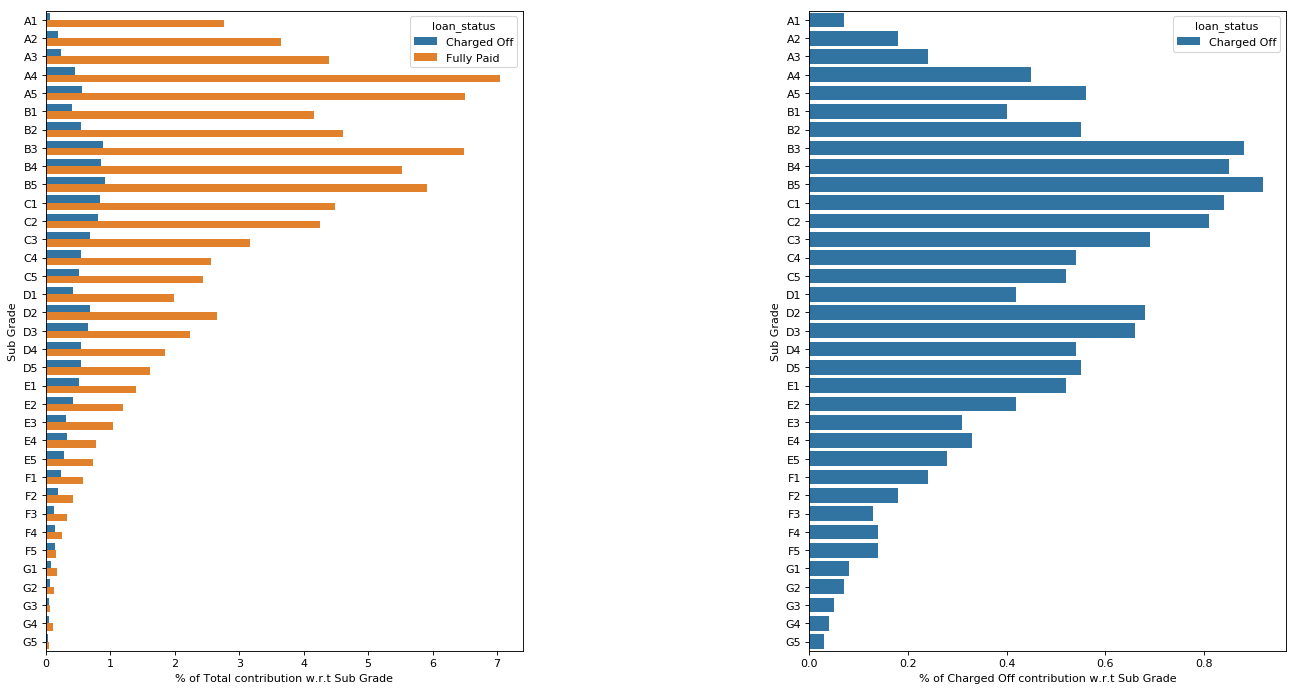

In [75]:
plt.figure(num=None, figsize=(20, 25), dpi=80, facecolor='w', edgecolor='k')
# subplot 1: Overall Split of Sub-Grades Among Loan Status
plt.subplot(2, 2, 1)
loan_by_sub_grade=loan.groupby(['sub_grade','loan_status'])
loan_sub_grade=round(100*(loan_by_sub_grade['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Sub Grade','sub_grade' : 'Sub Grade','loan_status':'loan_status'})
sns.barplot(y=loan_sub_grade['Sub Grade'], x=loan_sub_grade['% of Total contribution w.r.t Sub Grade'], hue=loan_sub_grade['loan_status'])
 
# subplot 2: % Defaultors as per each Sub-Grade
plt.subplot(2, 2, 2)
charged_sub_grade_df=loan.loc[(loan.loan_status=='Charged Off'),:].groupby(['sub_grade','loan_status'])
charged_sub_grade=round(100*(charged_sub_grade_df['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Charged Off contribution w.r.t Sub Grade','sub_grade' : 'Sub Grade','loan_status':'loan_status'})
sns.barplot(y=charged_sub_grade['Sub Grade'], x=charged_sub_grade['% of Charged Off contribution w.r.t Sub Grade'], hue=charged_sub_grade['loan_status'])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.5)
plt.show()

We can see from the above differentiation A5,B5,C1,D2,E1,F1,G2 have maximum no. of Defaultors

Next is Home Ownership of Loan Borrower, either the Borrower owns,rent, mortage any property

In [76]:
own_home_df=pd.DataFrame(loan.groupby(['home_ownership','loan_status'])['loan_amnt'].agg([('# of Cases ','count'),('%Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))]))
own_home_df

# of Cases   %Contribution
home_ownership loan_status                            
MORTGAGE       Charged Off         2196           5.97
               Fully Paid         14138          38.42
OTHER          Charged Off           18           0.05
               Fully Paid            78           0.21
OWN            Charged Off          385           1.05
               Fully Paid          2318           6.30
RENT           Charged Off         2667           7.25
               Fully Paid         15000          40.76

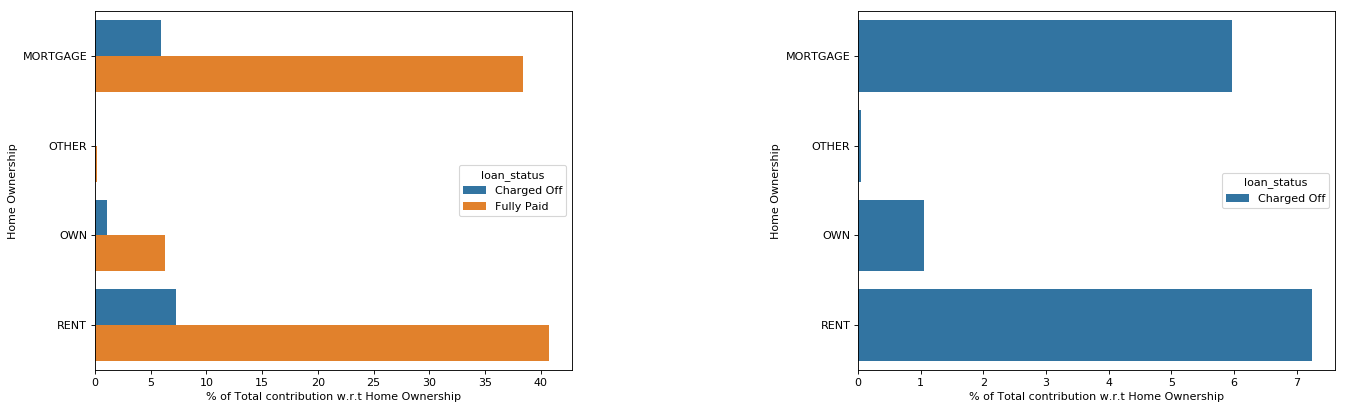

In [77]:
plt.figure(num=None, figsize=(20, 14), dpi=80, facecolor='w', edgecolor='k')
# subplot 1: Overall Split of Home Ownership among different Loan Status
plt.subplot(2, 2, 1)
loan_by_home=loan.groupby(['home_ownership','loan_status'])
home_df=round(100*(loan_by_home['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Home Ownership','home_ownership' : 'Home Ownership','loan_status':'loan_status'})
sns.barplot(y=home_df['Home Ownership'], x=home_df['% of Total contribution w.r.t Home Ownership'], hue=home_df['loan_status'])

# subplot 2: % of Defaultors
plt.subplot(2, 2, 2)
home_charged=loan.loc[(loan.loan_status=='Charged Off'),:].groupby(['home_ownership','loan_status'])
home_Charged_df=round(100*(home_charged['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Home Ownership','home_ownership' : 'Home Ownership','loan_status':'loan_status'})
sns.barplot(y=home_Charged_df['Home Ownership'], x=home_Charged_df['% of Total contribution w.r.t Home Ownership'], hue=home_Charged_df['loan_status'])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.5)
plt.show()

If the Borrower have its own house then it is likely to prone to be a Defaultor. This is clear indication for Loan Approval on Fresh Applications

Next is to check if the verification of borrowers Income quotes effects an line on Loan Status

In [78]:
inc_source_df=pd.DataFrame(loan.groupby(['verification_status','loan_status'])['loan_amnt'].agg([('# of Cases ','count'),('%Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))]))
inc_source_df

# of Cases   %Contribution
verification_status loan_status                            
Not Verified        Charged Off         1924           5.23
                    Fully Paid         13630          37.04
Source Verified     Charged Off         1393           3.79
                    Fully Paid          8090          21.98
Verified            Charged Off         1949           5.30
                    Fully Paid          9814          26.67

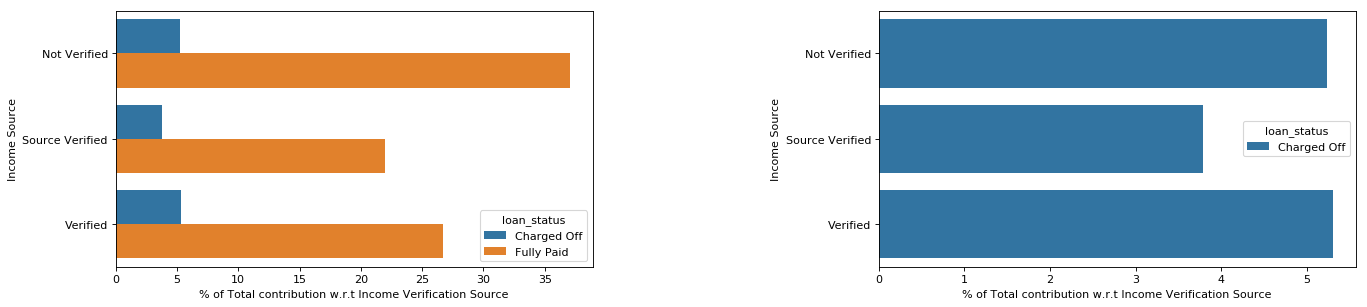

In [79]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
# subplot 1:  Overall Split of verification Status among different Loan Status
plt.subplot(2, 2, 1)
loan_by_source=loan.groupby(['verification_status','loan_status'])
source_df=round(100*(loan_by_source['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Income Verification Source','verification_status' : 'Income Source','loan_status':'loan_status'})
sns.barplot(y=source_df['Income Source'], x=source_df['% of Total contribution w.r.t Income Verification Source'], hue=source_df['loan_status'])

# subplot 2: % of Defaultors
plt.subplot(2, 2, 2)
charged_inc_df=loan.loc[(loan.loan_status=='Charged Off'),:].groupby(['verification_status','loan_status'])
charged_source_df=round(100*(charged_inc_df['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Income Verification Source','verification_status' : 'Income Source','loan_status':'loan_status'})
sns.barplot(y=charged_source_df['Income Source'], x=charged_source_df['% of Total contribution w.r.t Income Verification Source'], hue=charged_source_df['loan_status'])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.5)
plt.show()

If the source is verificed than we can see less number of cases being as defaultors

Next is last finding of Segmented Analysis is to find Purpose of the Loan affects the Defaultors %

In [80]:
ln_purpose_df=pd.DataFrame(loan.groupby(['purpose','loan_status'])['loan_amnt'].agg([('# of Cases ','count'),('%Contribution',lambda x: round(100*(x.count()/len(loan.index)),2))]))
ln_purpose_df

# of Cases   %Contribution
purpose            loan_status                            
car                Charged Off          151           0.41
                   Fully Paid          1278           3.47
credit_card        Charged Off          501           1.36
                   Fully Paid          4298          11.68
debt_consolidation Charged Off         2623           7.13
                   Fully Paid         14750          40.08
educational        Charged Off           49           0.13
                   Fully Paid           247           0.67
home_improvement   Charged Off          319           0.87
                   Fully Paid          2415           6.56
house              Charged Off           58           0.16
                   Fully Paid           291           0.79
major_purchase     Charged Off          206           0.56
                   Fully Paid          1849           5.02
medical            Charged Off           99           0.27
                   Fully Paid           546           1.48
moving             Charged Off           81           0.22
                   Fully Paid           460           1.25
other              Charged Off          578           1.57
                   Fully Paid          3017           8.20
renewable_energy   Charged Off           18           0.05
                   Fully Paid            76           0.21
small_business     Charged Off          444           1.21
                   Fully Paid          1212           3.29
vacation           Charged Off           50           0.14
                   Fully Paid           291           0.79
wedding            Charged Off           89           0.24
                   Fully Paid           804           2.18

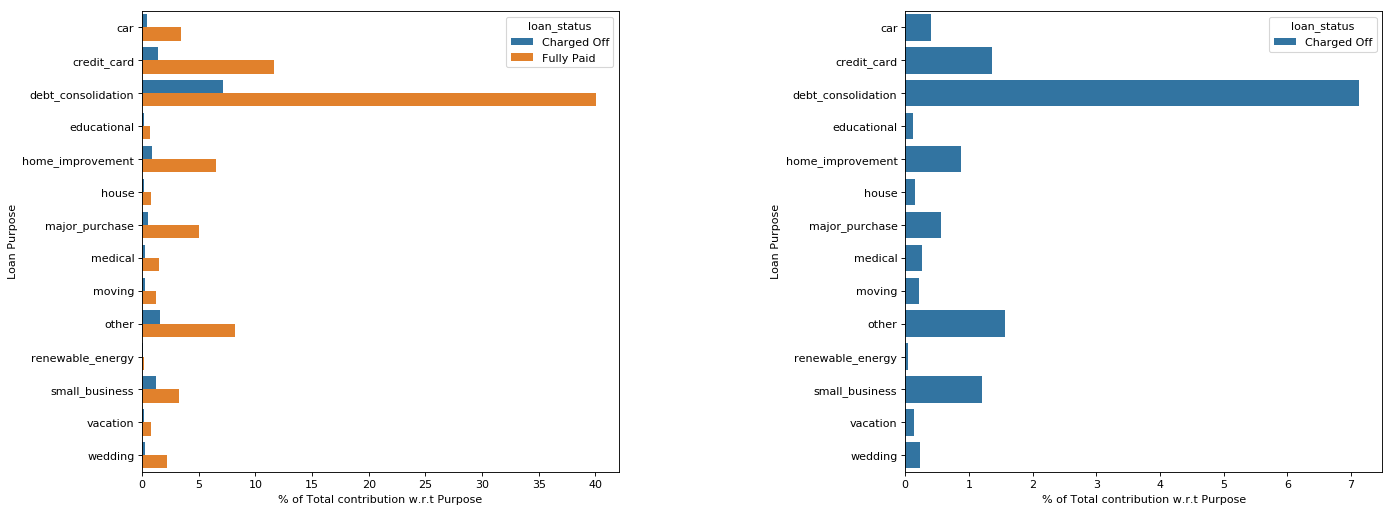

In [81]:
plt.figure(num=None, figsize=(20, 18), dpi=80, facecolor='w', edgecolor='k')
# subplot 1: Pupose vs Loan Status %
plt.subplot(2, 2, 1)
loan_by_purpose=loan.groupby(['purpose','loan_status'])
purpose_df=round(100*(loan_by_purpose['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Purpose','purpose' : 'Loan Purpose','loan_status':'loan_status'})
sns.barplot(y=purpose_df['Loan Purpose'], x=purpose_df['% of Total contribution w.r.t Purpose'], hue=purpose_df['loan_status'])
 
# subplot 2: % Deafulters per each Purpose
plt.subplot(2, 2, 2)
charged_purpose_df=loan.loc[(loan.loan_status=='Charged Off'),:].groupby(['purpose','loan_status'])
charged_Purpose=round(100*(charged_purpose_df['loan_amnt'].count()/len(loan.index)),2).reset_index().rename(columns={'loan_amnt':'% of Total contribution w.r.t Purpose','purpose' : 'Loan Purpose','loan_status':'loan_status'})
sns.barplot(y=charged_Purpose['Loan Purpose'], x=charged_Purpose['% of Total contribution w.r.t Purpose'], hue=charged_Purpose['loan_status'])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.5)
plt.show()

As per the analysis above debt_consolidation is having Maximum number of Defaultors, so for fresh application it will be good practice to avoide passing these type of loans

At last after studying different pattern above on categorical segments we can say for fresh Applications Purpose, Home Ownership, Annual Income, Interest Rate, Loan Grade, Loan Amount are the driving Factors

### Bivariate Analysis


#### Interest Rates and Loan Amount

Let's start with the understanding of loan amount and interest rates

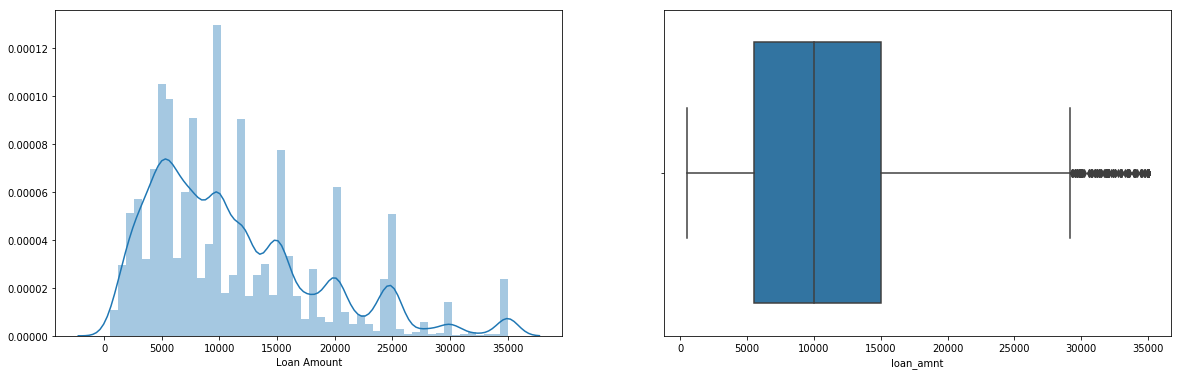

In [82]:
#loan amnt distribution plot
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.distplot(loan['loan_amnt'], axlabel = 'Loan Amount', ax=ax0)
sns.boxplot(loan['loan_amnt'], ax=ax1)
plt.show()

Loan amount is mostly in the range of 5000-15000

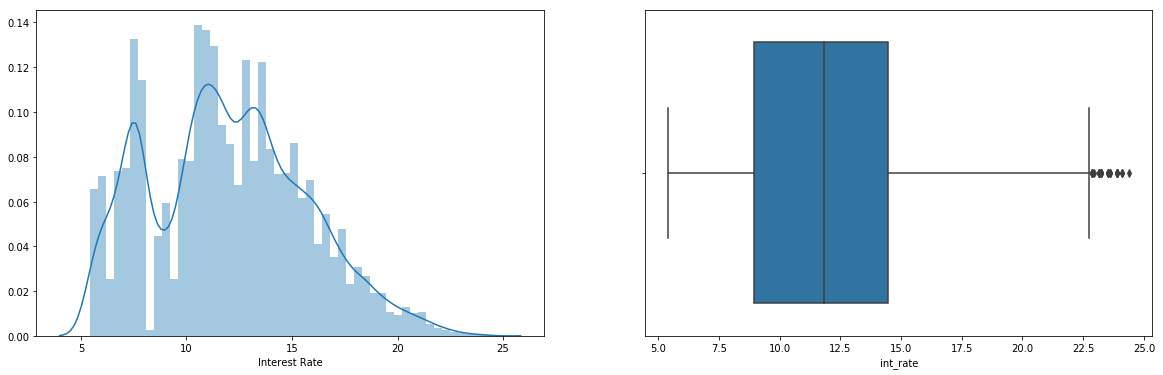

In [83]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.distplot(loan['int_rate'], axlabel = 'Interest Rate', ax=ax0)
sns.boxplot(loan['int_rate'], ax=ax1)
plt.show()

Interest rate are mostly in the range of 8-15%, note some of loans are offered at interest rates higher than 20%

Now let's see how the loan amnt and interest rates changes over the time period

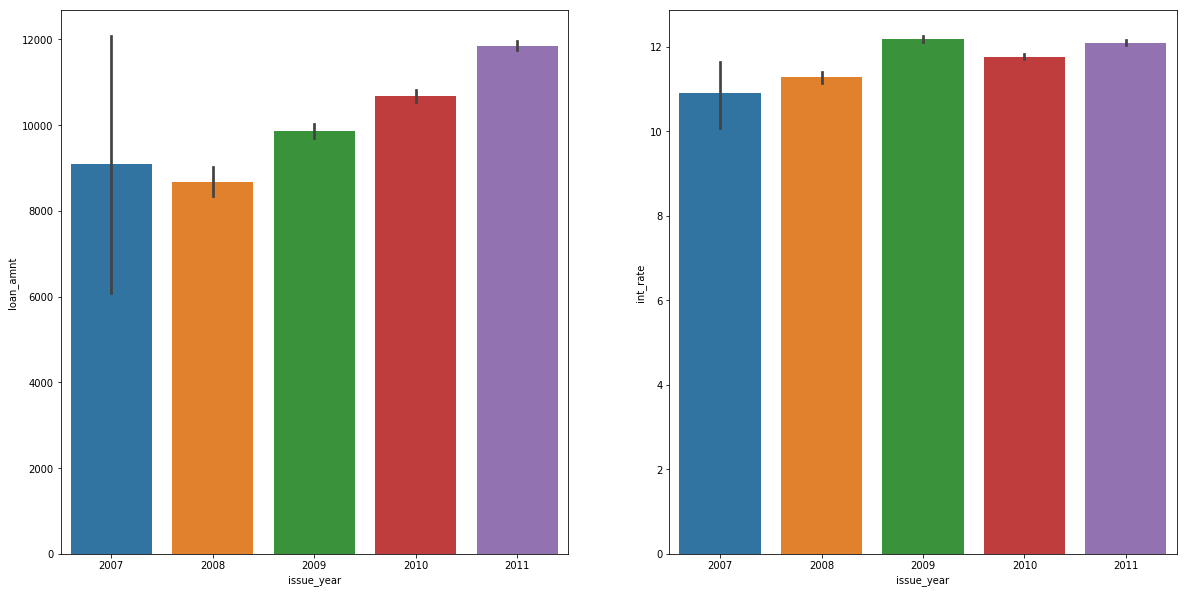

In [84]:
tmp=loan[['loan_amnt', 'int_rate', 'issue_d']]
tmp['issue_year']=loan['issue_d'].dt.year
fig,(ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.barplot(x='issue_year', y='loan_amnt', data=tmp, ax=ax0)
sns.barplot(x='issue_year', y='int_rate', data=tmp, ax=ax1)
plt.show()

We can see Loan amount has been increasing over the years, in 2008 there's a change in trend and that may be due to the economic crisis, also interest rate has been increasing gradually over the years.

#### Grades

Let's see how grades are related and try to find out it's impact on our analysis.

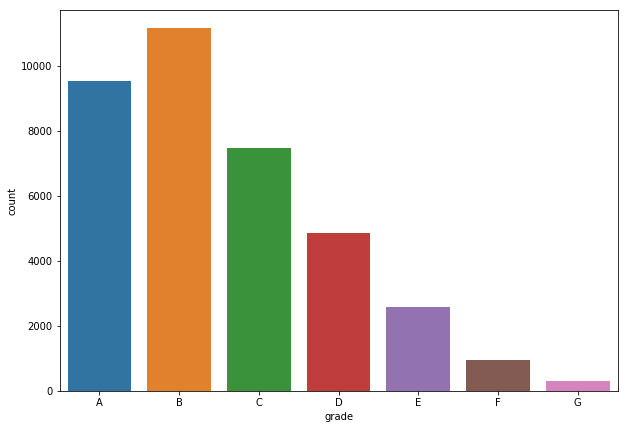

In [85]:
plt.figure(figsize=(10,7))
sns.countplot(x='grade', data=loan, order=['A','B','C','D','E','F','G'])
plt.show()

As visually clear from above plot, most of the loans are of high grade. Let's see their impact on charge-offs

Text(0, 0.5, 'Charged Off loans in %')

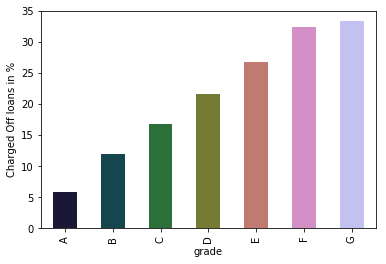

In [86]:
grp = loan.groupby(['loan_status','grade'])['grade'].count()
cnt = loan.groupby('grade')['grade'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Clearly evident from above graph low grades have more chances of charged-offs and we should avoid giving loans to customers in lower grade.

Let's see how we are charging Interest Rates as per the grades

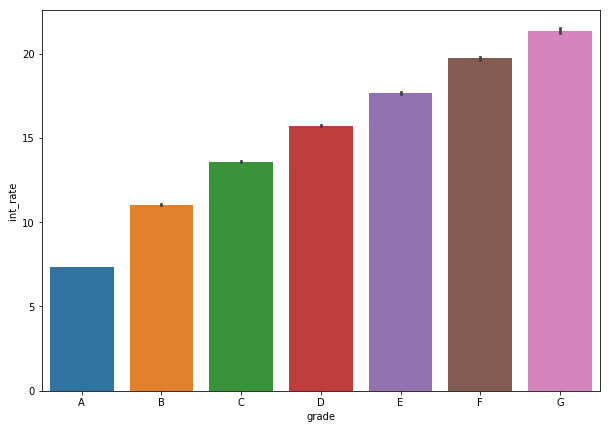

In [87]:
plt.figure(figsize=(10,7))
sns.barplot(x='grade', y='int_rate',data=loan,order=['A','B','C','D','E','F','G'])
plt.show()

Above plot suggests that we are charging more interest rates in lower grade that is good as they are more riskier.

#### Loan Amount

In [88]:
#Frist we need to bin income variable for better visualization.
loan['loan_amnt'].describe()

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [89]:
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], [x for x in range(0, 36000, 5000)], 
                                      labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

In [90]:
loan[['loan_amnt','loan_amnt_bin']].head()

,loan_amnt,loan_amnt_bin
0,5000,0-5k
1,2500,0-5k
2,2400,0-5k
3,10000,5-10k
5,5000,0-5k


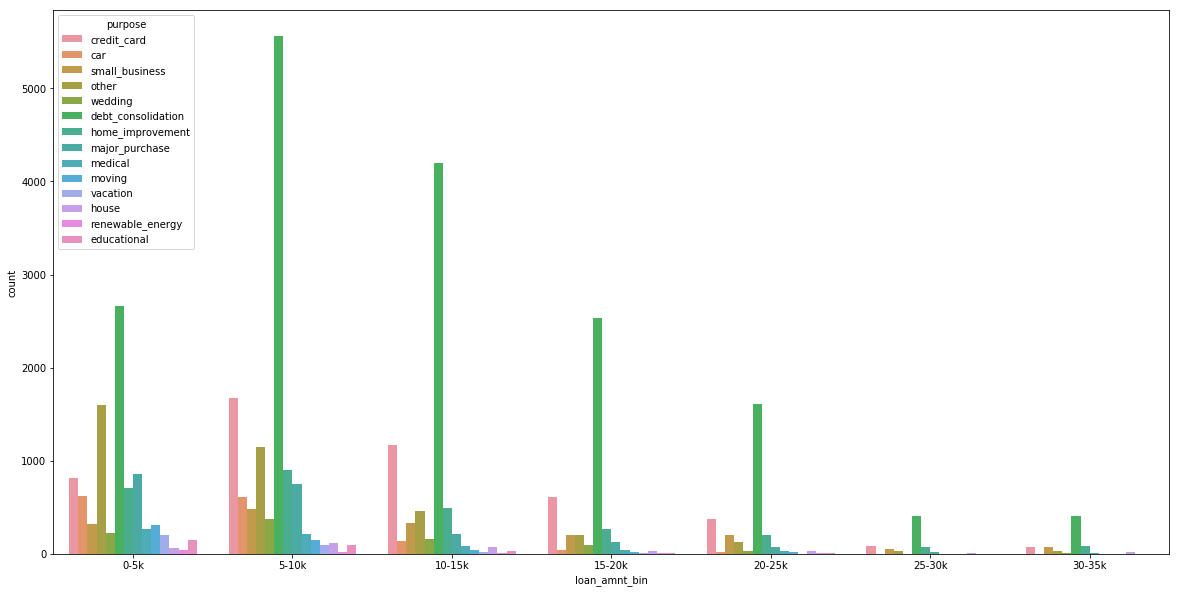

In [91]:
plt.figure(figsize=(20,10))
sns.countplot(x='loan_amnt_bin', hue='purpose',data=loan)
plt.show()

We can see in detail here, debt consolidation and credit card are always the top purpose in each loan amount segment.

Text(0, 0.5, 'Count of loans')

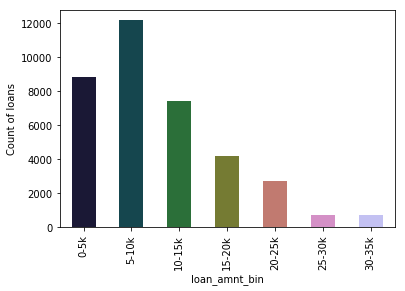

In [92]:
#Let's plot loan amount against percentage of charge-offs to see it's impact on defaults
grp=loan.groupby(by=['loan_status', 'loan_amnt_bin'])['loan_amnt_bin'].count()
cnt=loan.groupby(by='loan_amnt_bin')['loan_amnt_bin'].count()
ax=cnt.plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Count of loans')

We can see most of the loan_amnt has been taken in the range of 5-10k

Text(0, 0.5, 'Charged Off loans in %')

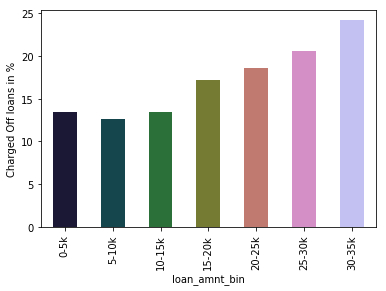

In [93]:
perc=grp.unstack() * 100/ cnt.T
ax=perc.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

This clearly depicts that instead most of the loan amount are in the lower range but charge-offs increases as the loan amount increases. Approving high amount of loans is always risky as it will have more than 20% chances of defaults.

#### Customer Income/ Annual Income

In [94]:
#bin customer income and compare it with loan amount and loan status.
loan.annual_inc.describe()

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

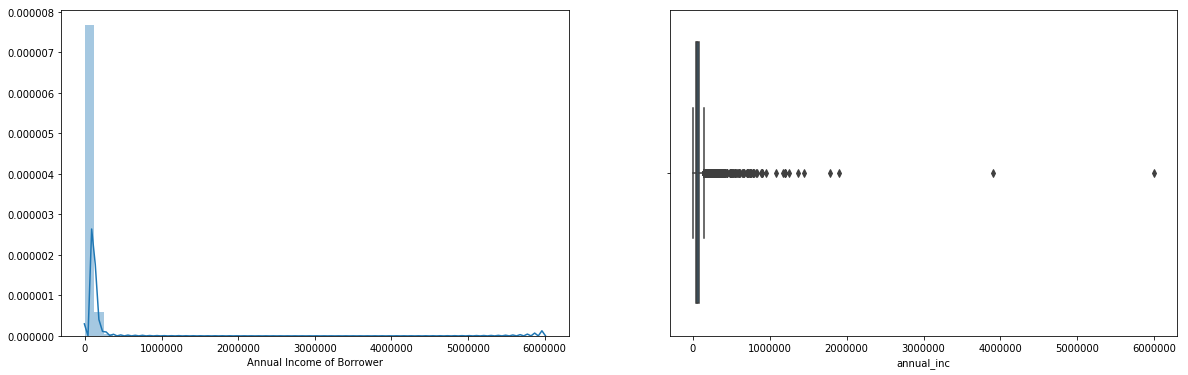

In [95]:
#annual income distribution plot
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.distplot(loan['annual_inc'], axlabel = 'Annual Income of Borrower', ax=ax0)
sns.boxplot(loan['annual_inc'], ax=ax1)
plt.show()

We can see there are some outliers which are affecting the visualization of this graph, outliers must be avoided to see the existing patterns.

In [96]:
#excluding outliers in annual income
temp=loan[loan['annual_inc'] < 150000]
temp.annual_inc.max()

149981.0

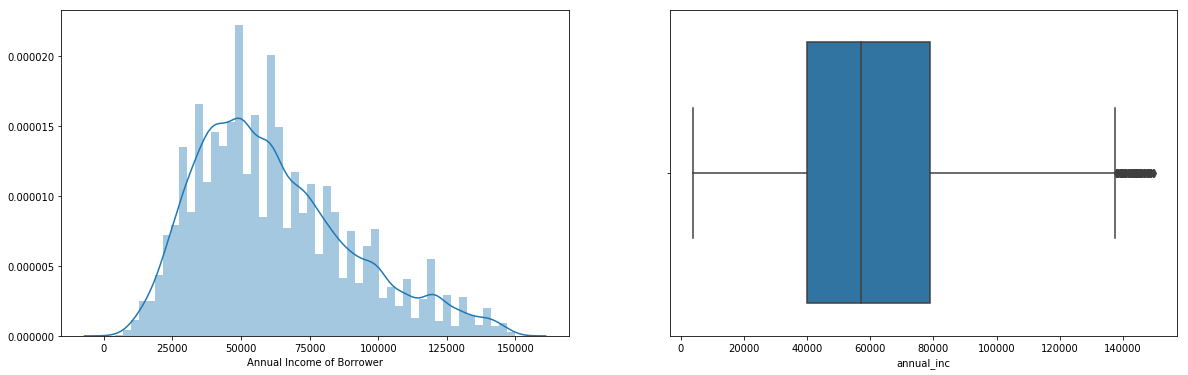

In [97]:
#annual income distribution plot
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.distplot(temp['annual_inc'], axlabel = 'Annual Income of Borrower', ax=ax0)
sns.boxplot(temp['annual_inc'], ax=ax1)
plt.show()

In above plot we can see the maximun spread is in between 0-150000 and bin size of 25000 seems good for analysis

In [98]:
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], [x for x in range(0, 160000, 25000)], 
                                      labels=[str(x)+'-'+str(x+25)+'k' for x in range (0, 150, 25)])

In [99]:
loan[['annual_inc', 'annual_inc_bin']].head(5)

,annual_inc,annual_inc_bin
0,24000.0,0-25k
1,30000.0,25-50k
2,12252.0,0-25k
3,49200.0,25-50k
5,36000.0,25-50k


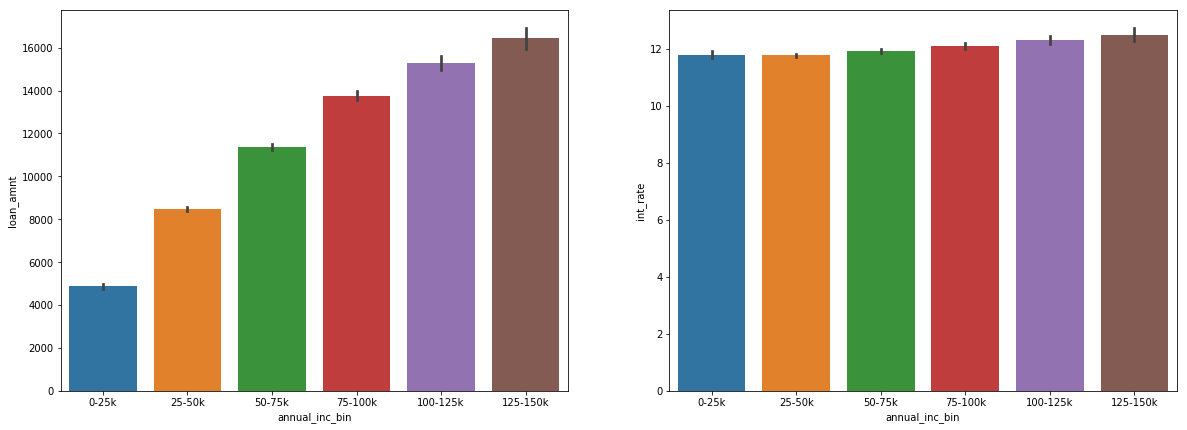

In [100]:
#plotting annual income against loan amount and int_rate
fig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.barplot(x='annual_inc_bin', y='loan_amnt',data=loan,ax=ax0)
sns.barplot(x='annual_inc_bin', y='int_rate',data=loan,ax=ax1)
plt.show()

This seems obvious, loan amount increases as income increases and a small variance in int rate that is obvious also.

Text(0, 0.5, 'Charged Off loans in %')

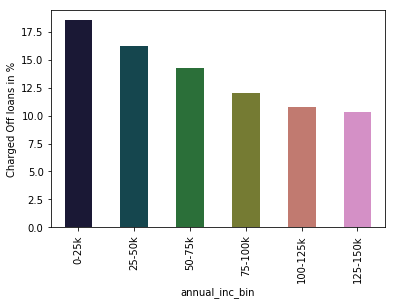

In [101]:
grp = loan.groupby(['loan_status','annual_inc_bin'])['annual_inc_bin'].count()
cnt = loan.groupby('annual_inc_bin')['annual_inc_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Charge-Offs percentage are more for customer in lower income segment, Lending clubs can be more concious when providing loan in lower annual income segment.

#### DTI - Debt To Income ratio

Let's see how DTI ratio is related with Loan status

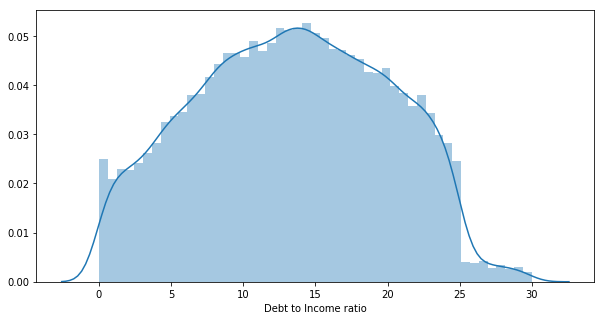

In [102]:
#first we will see the DTI variance and data spread to identify the bin size.
plt.figure(figsize=(10,5))
sns.distplot(loan['dti'], axlabel='Debt to Income ratio')
plt.show()

In [103]:
loan.dti.describe()

count    36800.000000
mean        13.334529
std          6.650154
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [104]:
#Lets derive new column dti_bin
loan['dti_bin'] = pd.cut(loan['dti'], [x for x in range(0, 31, 5)], 
                                      labels=[str(x)+'-'+str(x+5)+'%' for x in range (0, 30, 5)])

In [105]:
loan[['dti', 'dti_bin']].head()

,dti,dti_bin
0,27.65,25-30%
1,1.00,0-5%
2,8.72,5-10%
3,20.00,15-20%
5,11.20,10-15%


In [106]:
#Let's plot dti against the percentage of charged off loans.
grp=loan.groupby(by=['loan_status', 'dti_bin'])['dti_bin'].count()
cnt=loan.groupby(by='dti_bin')['dti_bin'].count()
cnt

dti_bin
0-5%      4565
5-10%     7488
10-15%    9228
15-20%    8450
20-25%    6328
25-30%     596
Name: dti_bin, dtype: int64

Note: There are very less customer in DTI range 25-30%

In [107]:
perc=grp.unstack()*100/cnt.T
perc

dti_bin,0-5%,5-10%,10-15%,15-20%,20-25%,25-30%
loan_status,,,,,,
Charged Off,12.157722,12.486645,14.250108,15.491124,16.577118,13.255034
Fully Paid,87.842278,87.513355,85.749892,84.508876,83.422882,86.744966


Text(0, 0.5, '% of loans Charged Off')

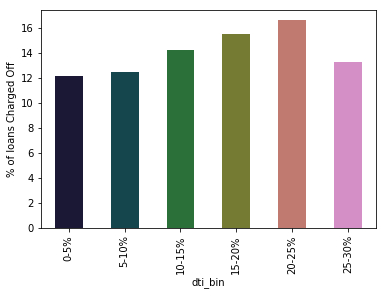

In [108]:
ax=perc.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('% of loans Charged Off')

Charge-Offs percentage is increasing as DTI increases that means it is risky to provide loans to customer whose DTI percentage is high. Charge-Offs percentage is more than 14% in DTI range 15-25% but decreases after that which is due to the very less number of customer in that range.

#### Home Ownership Vs Loan Status

In [109]:
#before comparison, lets filter out our loan dataset to include only fully_paid and charged-off loan status, 
#current wont add much in our analysis.
filter_cond=loan['loan_status'].str.contains('Charged Off') | loan['loan_status'].str.contains('Fully Paid')
loan_filtered = loan[filter_cond]
loan_filtered.loan_status.value_counts()

Fully Paid     31534
Charged Off     5266
Name: loan_status, dtype: int64

Text(0, 0.5, 'Charged Off loans in %')

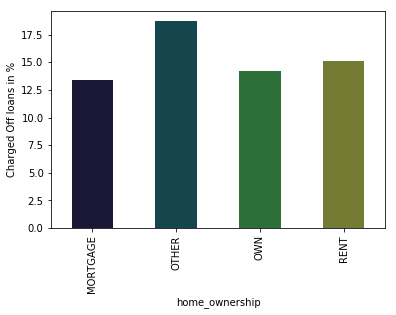

In [110]:
grp = loan.groupby(['loan_status','home_ownership'])['home_ownership'].count()
cnt = loan.groupby('home_ownership')['home_ownership'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Here we can see that home ownership does not have any significant impact on Loan Status and we can not say that borrower's home ownership with rent or mortgage will tend to default more or vice versa.

#### Purpose Vs Loan Status

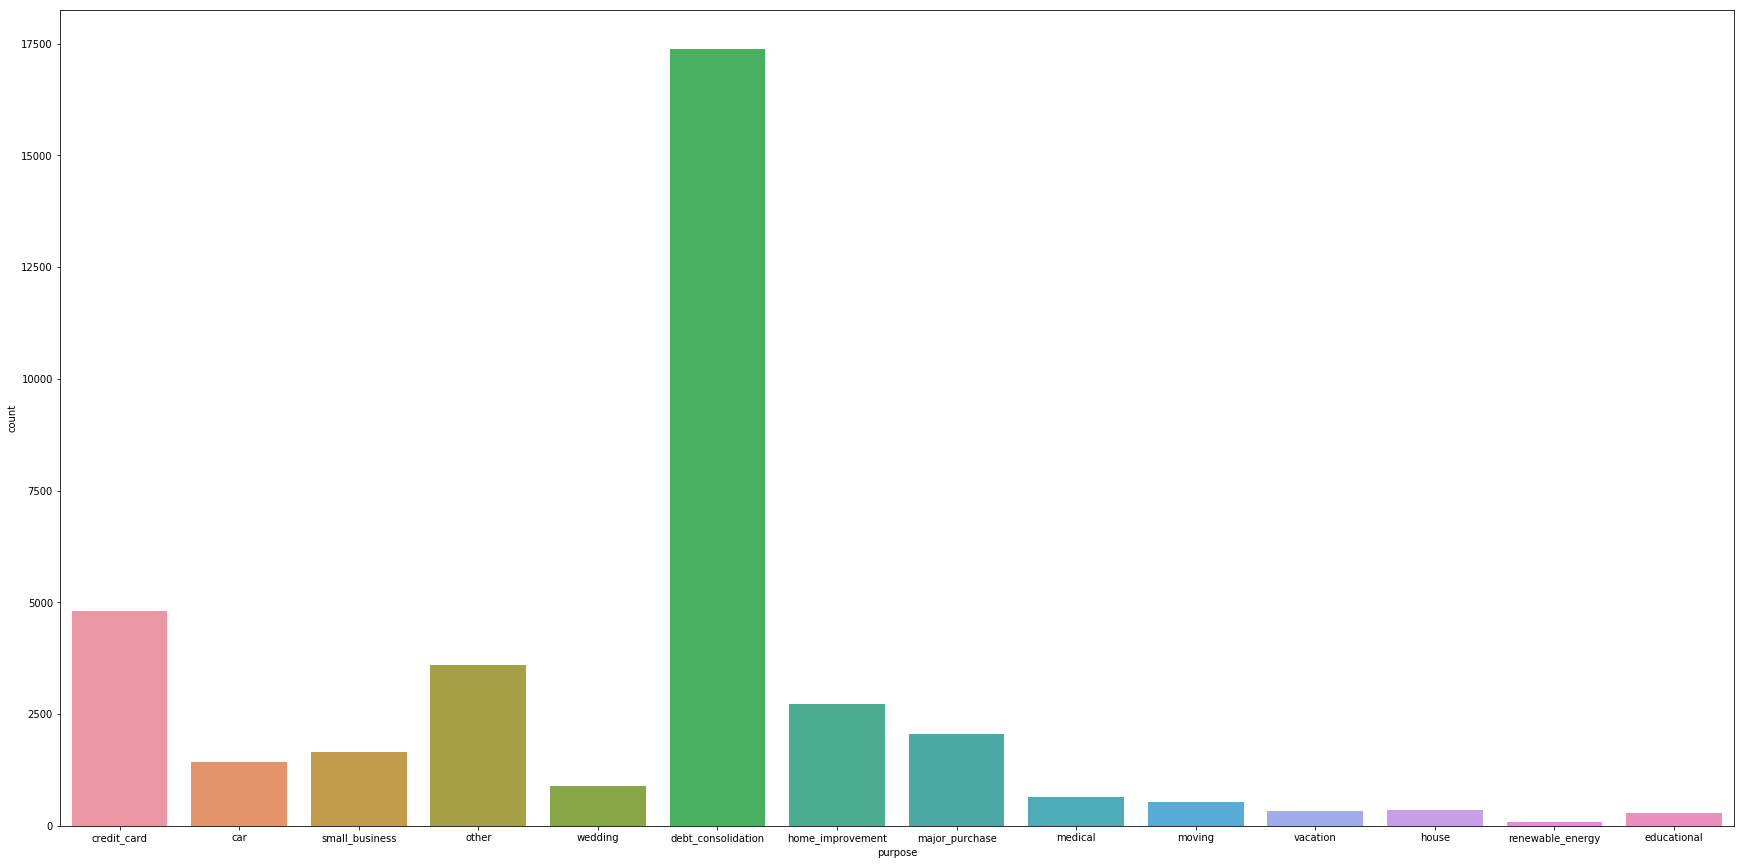

In [111]:
plt.figure(figsize = (30,15))
sns.countplot(x='purpose', data = loan)
plt.show()

More number of loans is taken for debt_consolidation followed by credit_card.

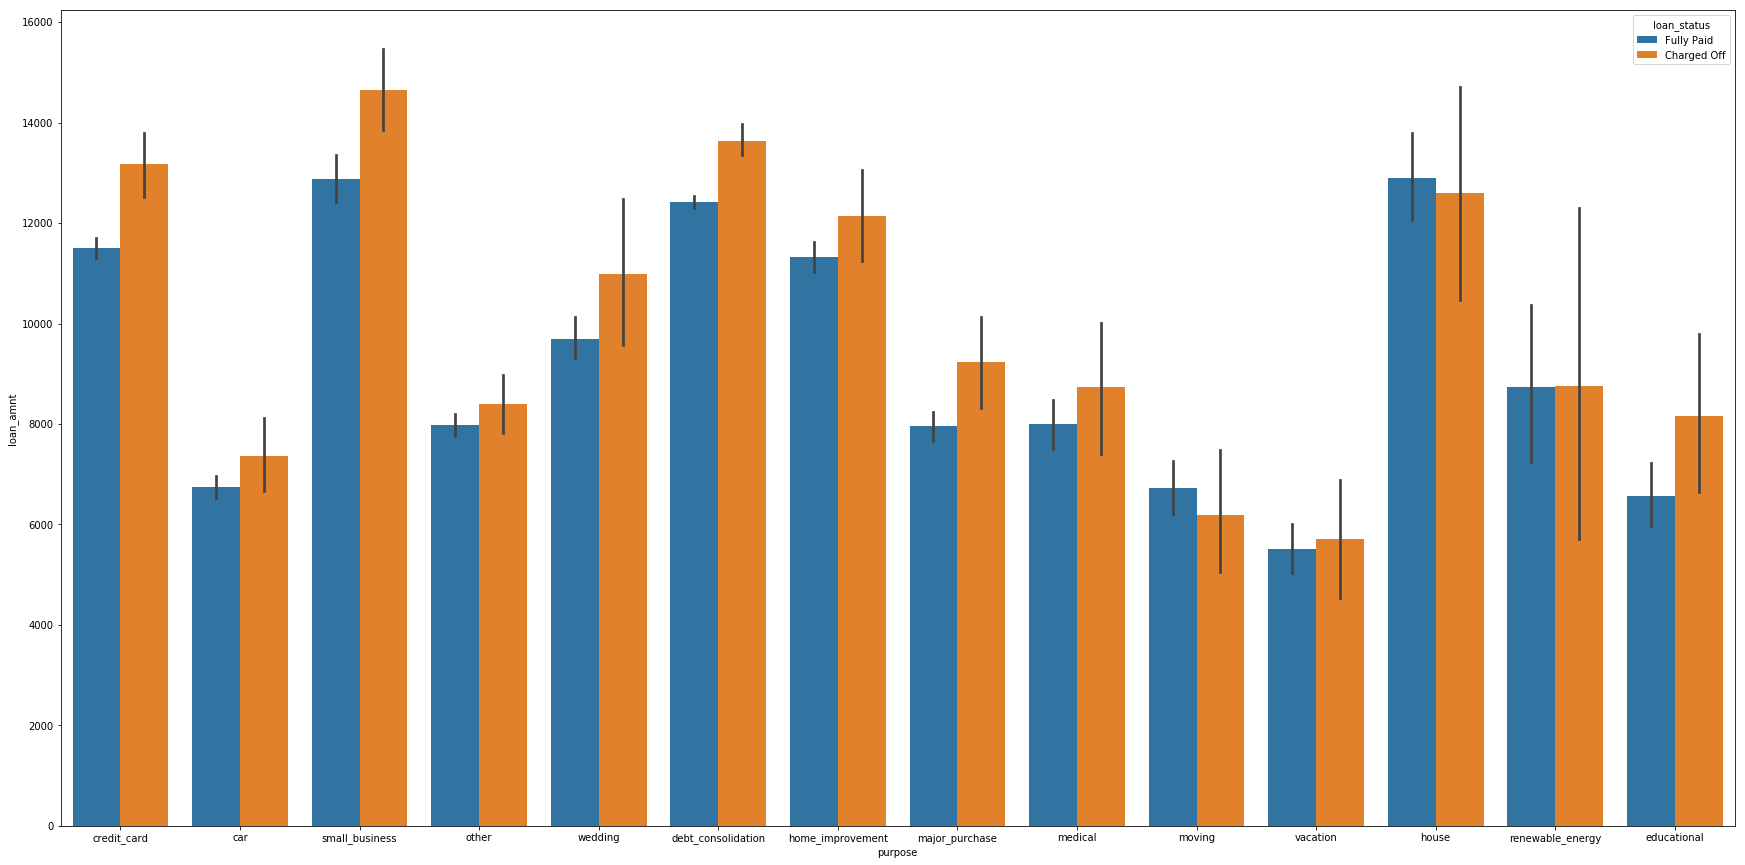

In [112]:
plt.figure(figsize=(30,15))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status',data=loan_filtered, estimator=np.mean)
plt.show()

This is one interesting observation, here we can see loan is taken more for small business purpose and also risk is more in when it is taken for the purpose of small business.

#### Emp Length Vs Loan Status

Text(0, 0.5, 'Charged Off loans in %')

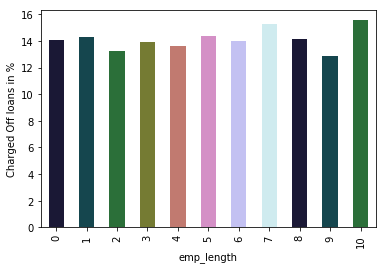

In [113]:
grp = loan.groupby(['loan_status','emp_length'])['emp_length'].count()
cnt = loan.groupby('emp_length')['emp_length'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Experienced borrowers have a slight more tendency of default but the difference is not that much significant to tell that borrowers in certain experience range are more expected to default on loans.

#### Interest Rate Vs Loan Status

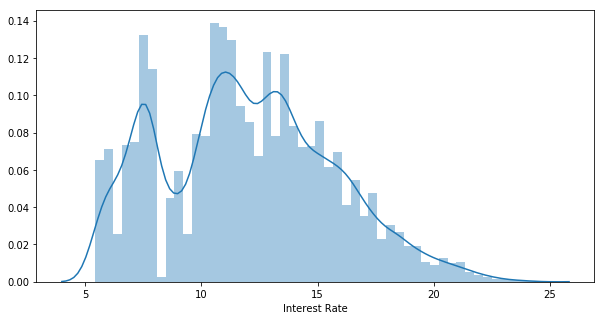

In [114]:
#we will see the int_rate variance and data spread to identify the bin size.
plt.figure(figsize=(10,5))
sns.distplot(loan['int_rate'], axlabel='Interest Rate')
plt.show()

In [115]:
loan.int_rate.describe()

count    36800.000000
mean        11.983745
std          3.701182
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [116]:
#Lets derive new column int_rate_bin
loan['int_rate_bin'] = pd.cut(loan['int_rate'], [x for x in range(0, 26, 5)], 
                                      labels=[str(x)+'-'+str(x+5)+'%' for x in range (0, 25, 5)])

In [117]:
loan[['int_rate', 'int_rate_bin']].head()

,int_rate,int_rate_bin
0,10.65,10-15%
1,15.27,15-20%
2,15.96,15-20%
3,13.49,10-15%
5,7.90,5-10%


Text(0, 0.5, 'Charged Off loans in %')

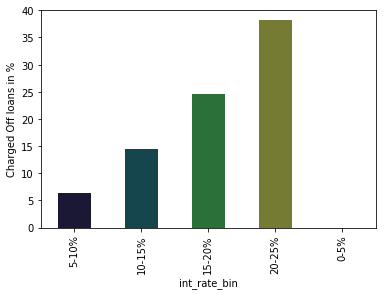

In [118]:
grp = loan.groupby(['loan_status','int_rate_bin'])['int_rate_bin'].count()
cnt = loan.groupby('int_rate_bin')['int_rate_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Form above plot we can see that charge-offs are more for loans with higher interest rates.

#### Revol_Util vs Loan Status

In [119]:
loan.revol_util.describe()

count    36800.000000
mean        48.992830
std         28.313209
min          0.000000
25%         25.600000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

In [120]:
loan['revol_util_bin'] = pd.cut(loan['revol_util'], [x for x in range(0, 101, 10)], 
                                      labels=[str(x)+'-'+str(x+10)+'%' for x in range (0, 100, 10)])

In [121]:
loan[['revol_util', 'revol_util_bin']].head()

,revol_util,revol_util_bin
0,83.7,80-90%
1,9.4,0-10%
2,98.5,90-100%
3,21.0,20-30%
5,28.3,20-30%


Text(0, 0.5, 'Charged Off loans in %')

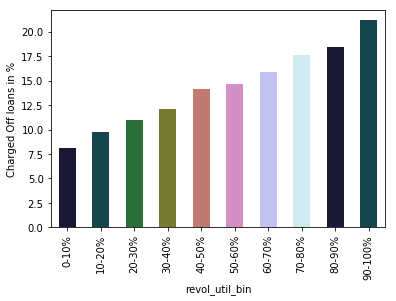

In [122]:
grp = loan.groupby(['loan_status','revol_util_bin'])['revol_util_bin'].count()
cnt = loan.groupby('revol_util_bin')['revol_util_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('cubehelix', 8))
ax.set_ylabel('Charged Off loans in %')

Revolving credit utilization is a good indicator of borrowers defaulting on loan, we can see in above plot charge-offs increases linearly with revol_util rate.

# Derived metrics

### There are two columns funded_amnt & total_pymnt which can be helpful in generating a new column termed as %Profit/Loss to company lending loan

In [123]:
loan['P&L']=round((loan['total_pymnt']-loan['funded_amnt'])*100/loan['funded_amnt'],2)

#### Lets checkout P&L values against every loan status

In [124]:
loan[['P&L','loan_status']].head(10)

,P&L,loan_status
0,17.26,Fully Paid
1,-59.65,Charged Off
2,25.24,Fully Paid
3,22.32,Fully Paid
5,12.64,Fully Paid
6,44.44,Fully Paid
7,31.30,Fully Paid
8,-88.46,Charged Off
9,-72.54,Charged Off
10,18.12,Fully Paid


### Lets checkout mean values of P&L against every loan status

In [125]:
print('Mean P&L',loan.groupby('loan_status')['P&L'].mean())

Mean P&L loan_status
Charged Off   -42.141679
Fully Paid     18.235030
Name: P&L, dtype: float64


### As we can see , mean value of P&L for defaulters with Loan_status='Charged Off' is negative ,So we can analyze defaulters pattern on the basis of this column

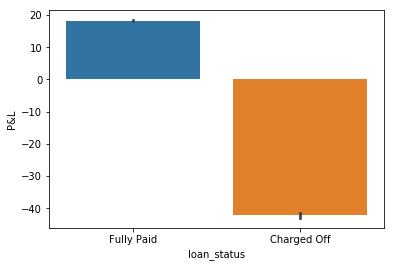

In [126]:
sns.barplot(y='P&L', x='loan_status', data=loan)


### Lets checkout variation of P&L with Grade of loan

In [127]:
print(loan.groupby(['grade'])['P&L'].median())

grade
A    10.280
B    16.280
C    20.740
D    23.640
E    26.805
F    28.720
G    29.440
Name: P&L, dtype: float64


#### So from Grade column ,company got least profit from Grade='A'

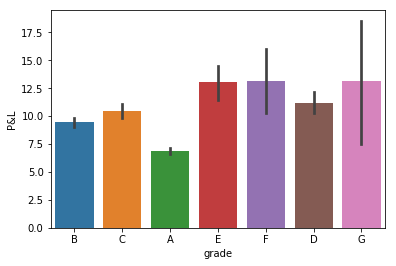

In [128]:
sns.barplot(y='P&L', x='grade', data=loan)


In [129]:
temp=loan.groupby(['purpose','loan_status']).agg({'P&L':'count'})
temp=temp.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))
temp1={'Defaulters%':{}}

for name in loan.purpose.dropna().unique():
    temp1['Defaulters%'][name]=temp['P&L'][name]['Charged Off']
temp=pd.DataFrame(temp1).sort_values(by = 'Defaulters%', ascending = False)
temp  = temp .sort_values(by = 'Defaulters%', ascending = False)
temp  = temp.iloc[:5, ]
temp  = temp .reset_index()
temp

,index,Defaulters%
0,small_business,26.8
1,renewable_energy,19.1
2,educational,16.6
3,house,16.6
4,other,16.1


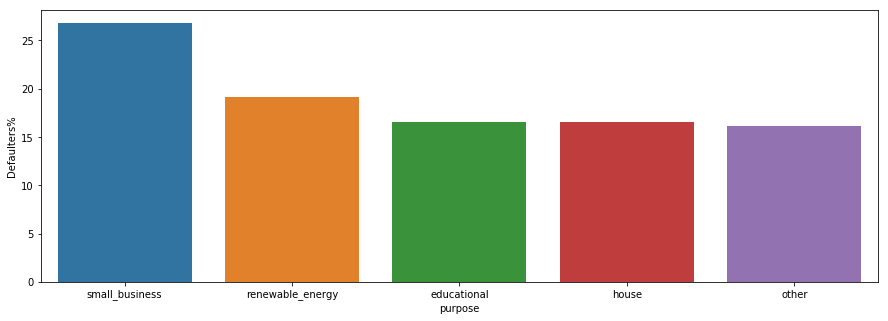

In [130]:
plt.figure(figsize=(15,5))

sns.barplot(x='index',y='Defaulters%',data=temp)
plt.xlabel("purpose")
plt.ylabel("Defaulters%")
plt.show()

### So we can see that people with purpose of small business defaulted most times

### Lets check out variation of Purpose with P&L column

In [131]:
print(loan.groupby(['purpose'])['P&L'].median().sort_values( ascending = True))

purpose
renewable_energy      11.965
major_purchase        12.290
car                   12.440
vacation              12.620
house                 12.640
medical               12.640
small_business        13.460
home_improvement      13.585
moving                13.660
other                 14.310
wedding               15.230
credit_card           15.250
educational           15.470
debt_consolidation    15.750
Name: P&L, dtype: float64


### From above analysis we can know about defaulters with specific purposes where P&L value was lowest.

### Lets check out Median variation of DTI(Debt to income ) w.r.t Purpose of loan for loan Status=Charged Off

In [132]:
print(loan[(loan.loan_status=='Charged Off')].groupby(['purpose','loan_status']).dti.median().sort_values( ascending = False))


purpose             loan_status
credit_card         Charged Off    16.000
debt_consolidation  Charged Off    15.540
vacation            Charged Off    13.815
moving              Charged Off    13.680
other               Charged Off    13.490
wedding             Charged Off    12.280
home_improvement    Charged Off    12.120
car                 Charged Off    12.010
renewable_energy    Charged Off    11.875
house               Charged Off    11.705
medical             Charged Off    11.700
small_business      Charged Off    11.490
major_purchase      Charged Off    11.400
educational         Charged Off    10.880
Name: dti, dtype: float64


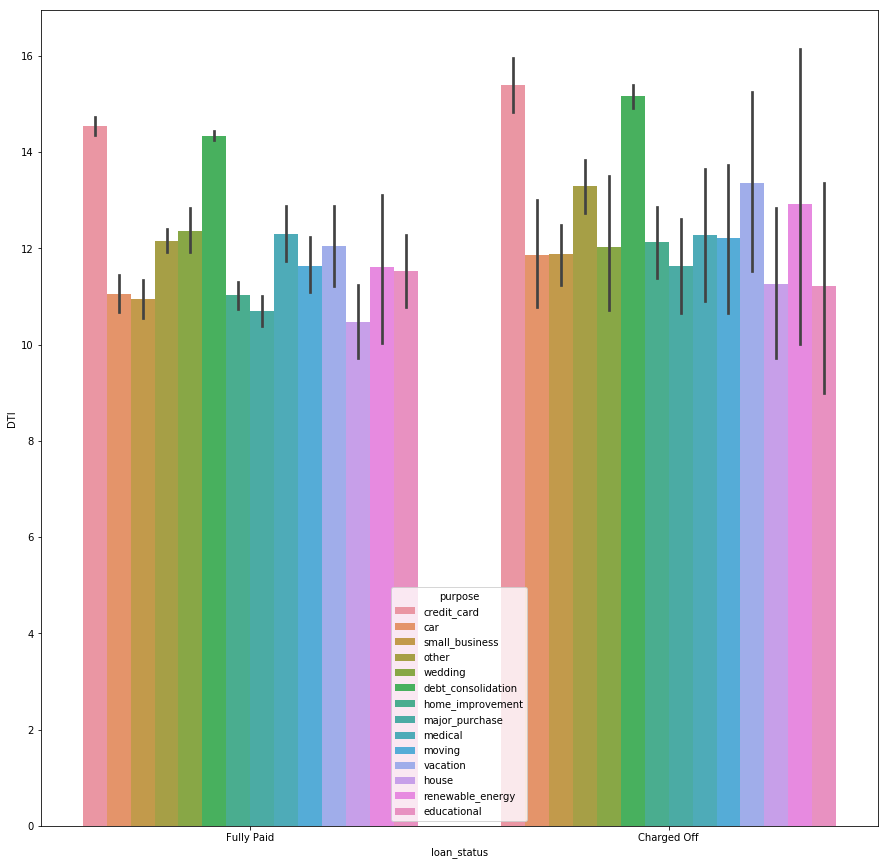

In [133]:

plt.figure(figsize=(15,15))

sns.barplot(x='loan_status',y='dti',hue='purpose',data=loan)
plt.ylabel("DTI")


plt.show()

### From above analysis we can say that People with more DTI usually takes loan for purposes like Credit Card, Car, small business etc

## Lets checkout number of unique values in column Term, if it can be useful for our analysis

In [134]:
loan.term.unique()

array([36, 60], dtype=int64)

## Lets check variation of Term with P&L as well as Loan status

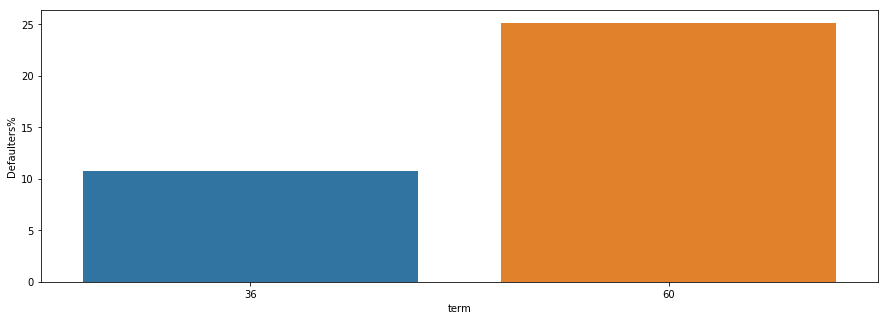

In [135]:
temp=loan.groupby(['term','loan_status']).agg({'P&L':'count'})
temp=temp.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))
temp1={'Defaulters%':{}}

for name in loan.term.dropna().unique():
    temp1['Defaulters%'][name]=temp['P&L'][name]['Charged Off']
temp=pd.DataFrame(temp1).sort_values(by = 'Defaulters%', ascending = False)
temp  = temp .sort_values(by = 'Defaulters%', ascending = False)
temp  = temp.iloc[:5, ]
temp  = temp .reset_index()
plt.figure(figsize=(15,5))

sns.barplot(x='index',y='Defaulters%',data=temp)
plt.xlabel("term")
plt.ylabel("Defaulters%")
plt.show()

### From above plots, we could observe that there were more defaulters among people who took loan for 60 months 

Text(0.5, 1.0, 'Profit/Loss vs term')

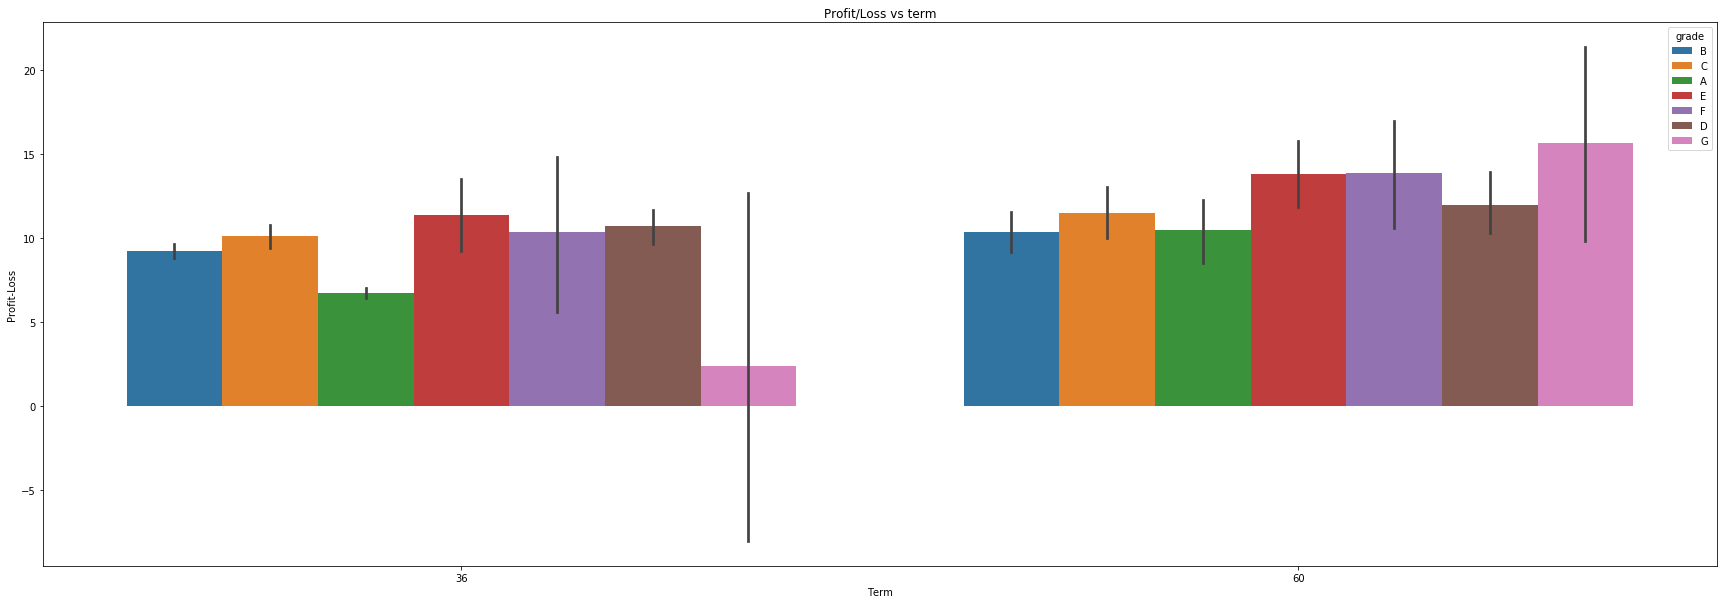

In [136]:
plt.figure(figsize=(30,10))

sns.barplot(x='term',y='P&L',data=loan,hue='grade')
plt.xlabel("Term")
plt.ylabel("Profit-Loss")

plt.title("Profit/Loss vs term")

### From above plots we can see that company can get more Profit out of people who took loan for higher term

### Lets Check variation of Emp_Length w.r.t  P&L values

Text(0.5, 1.0, 'P/L vs Employment Period')

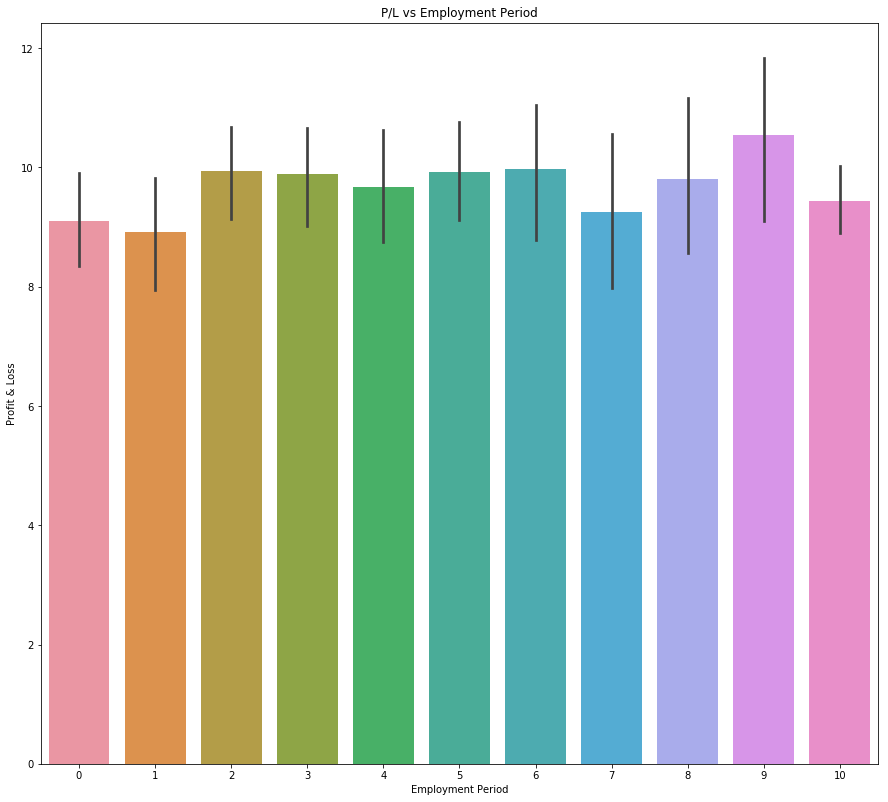

In [137]:
plt.figure(figsize=(15,30))

plt.subplot(2,1,1)
sns.barplot(x='emp_length',y='P&L',data=loan)
plt.xlabel("Employment Period")
plt.ylabel("Profit & Loss")

plt.title("P/L vs Employment Period")


### From above plots, we could see company got highest profit from people with 9 years of Exp 

## Lets checkout top 5 states with most profit to company

In [138]:
top5  = loan.pivot_table(values = 'P&L', index = 'addr_state', aggfunc = 'mean')
top5  = top5 .sort_values(by = 'P&L', ascending = False)
top5  = top5.iloc[:5, ]
top5  = top5 .reset_index()

top5

,addr_state,P&L
0,NE,20.620000
1,IN,19.320000
2,WY,17.295600
3,ID,16.032500
4,DC,14.058981


## Lets checkout top 5 states with least profit to company


In [139]:
low5  = loan.pivot_table(values = 'P&L', index = 'addr_state', aggfunc = 'mean')
low5  = low5 .sort_values(by = 'P&L', ascending = True)
low5  = low5.iloc[:5, ]
low5  = low5 .reset_index()

low5

,addr_state,P&L
0,NV,4.237109
1,TN,5.533000
2,UT,5.862158
3,FL,7.197296
4,OR,7.357319


Text(0.5, 1.0, 'State Vs P&L')

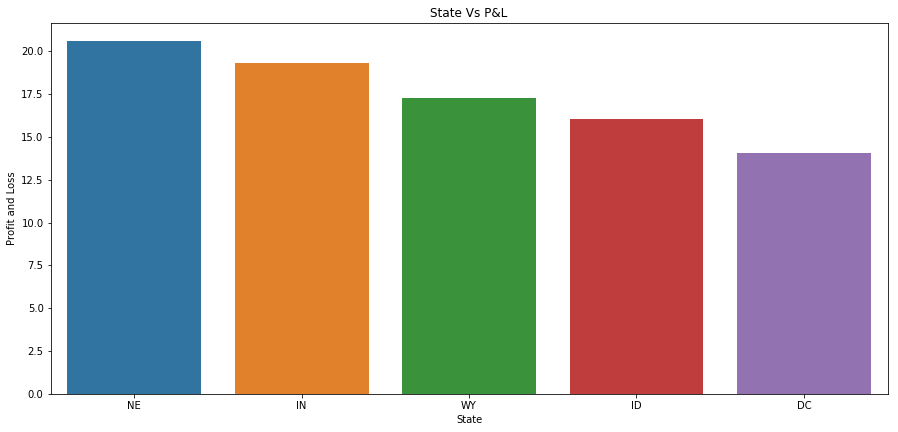

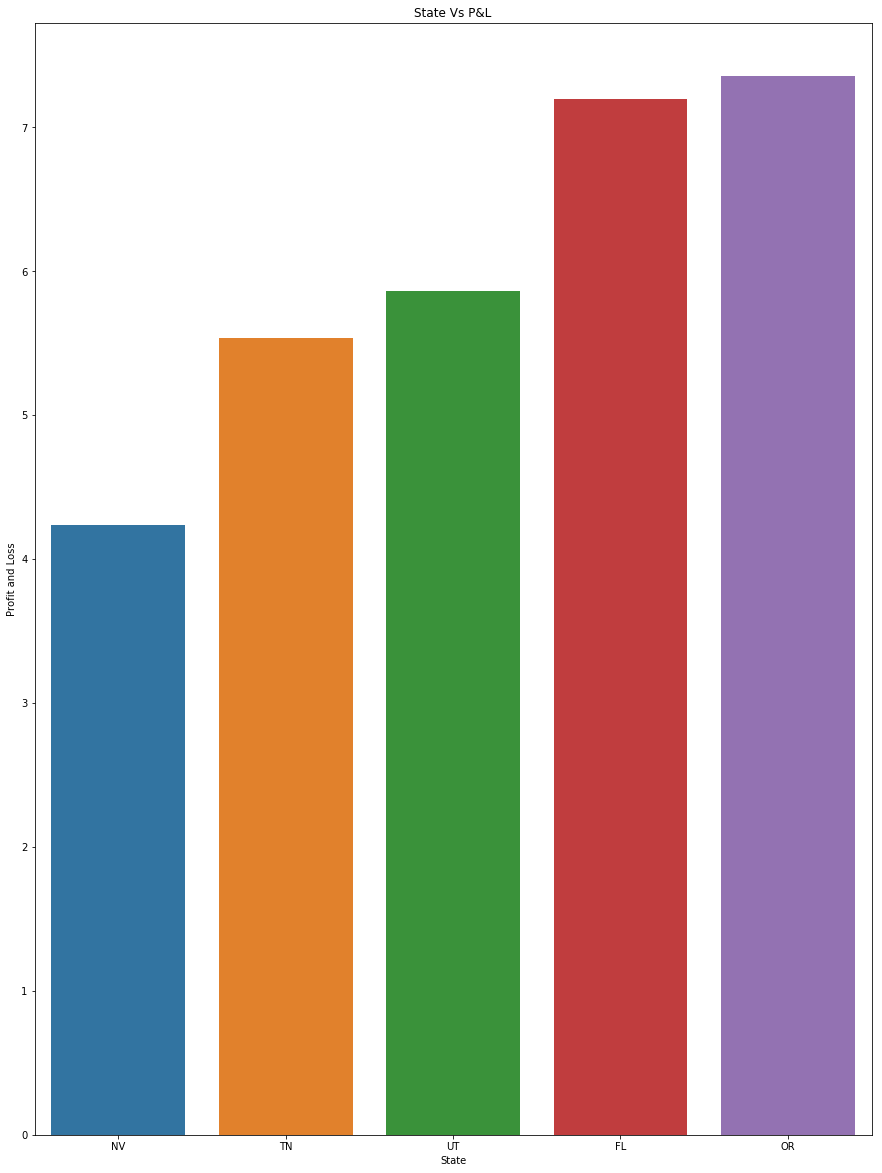

In [140]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
sns.barplot(x='addr_state',y='P&L',data=top5)
plt.xlabel("State")
plt.ylabel("Profit and Loss")

plt.title("State Vs P&L")


plt.figure(figsize=(15,45))

plt.subplot(2,1,1)
sns.barplot(x='addr_state',y='P&L',data=low5)
plt.xlabel("State")
plt.ylabel("Profit and Loss")

plt.title("State Vs P&L")

### From above plots we can conclude on States with most & least number of defaulters.

### Lets check on % of defaulters from each category of Emp_length

In [141]:
D1=loan.groupby(['emp_length','loan_status']).agg({'P&L':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))
D2.head(6)

P&L
emp_length loan_status      
0          Charged Off  14.0
           Fully Paid   86.0
1          Charged Off  14.3
           Fully Paid   85.7
2          Charged Off  13.2
           Fully Paid   86.8

In [142]:
Exp_PnL={'Defaulters%':{}}

for name in loan.emp_length.dropna().unique():
    Exp_PnL['Defaulters%'][name]=D2['P&L'][name]['Charged Off']
exp=pd.DataFrame(Exp_PnL).sort_values(by = 'Defaulters%', ascending = False)
exp  = exp .reset_index()
exp


,index,Defaulters%
0,10,15.6
1,7,15.3
2,1,14.3
3,5,14.3
4,8,14.1
5,0,14.0
6,6,14.0
7,3,13.9
8,4,13.6
9,2,13.2


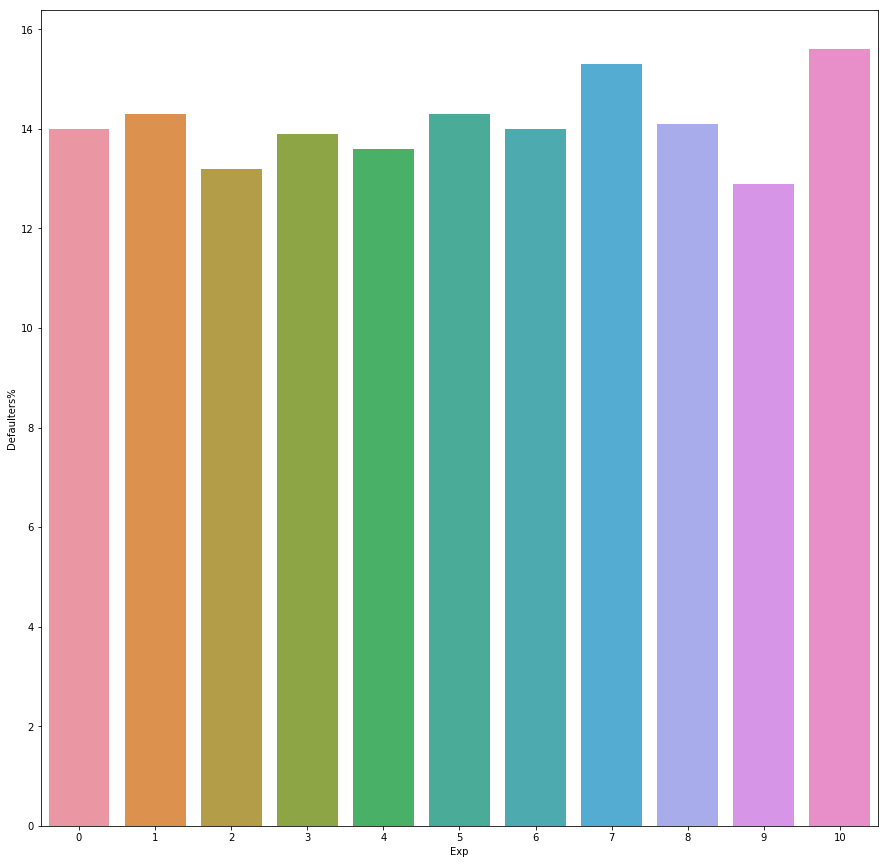

In [143]:
plt.figure(figsize=(15,15))

sns.barplot(x='index',y='Defaulters%',data=exp)
plt.xlabel("Exp")
plt.ylabel("Defaulters%")
plt.show()

### From above plot we can conclude that there are more % of defaulters with 9 years of Exp

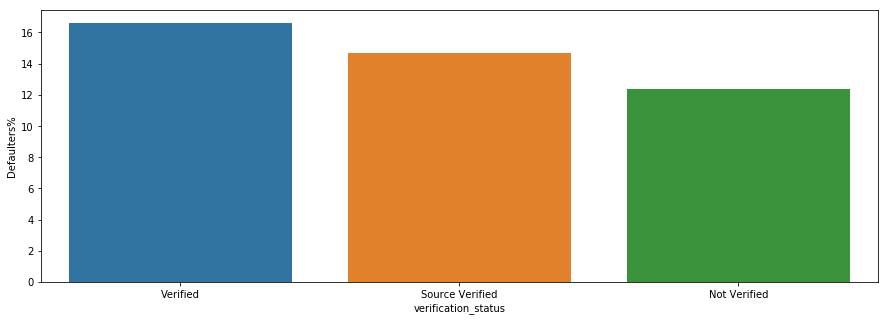

In [144]:
temp=loan.groupby(['verification_status','loan_status']).agg({'P&L':'count'})
temp=temp.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))
temp1={'Defaulters%':{}}

for name in loan.verification_status.dropna().unique():
    temp1['Defaulters%'][name]=temp['P&L'][name]['Charged Off']
temp=pd.DataFrame(temp1).sort_values(by = 'Defaulters%', ascending = False)
temp  = temp .reset_index()

plt.figure(figsize=(15,5))

sns.barplot(x='index',y='Defaulters%',data=temp)
plt.xlabel("verification_status")
plt.ylabel("Defaulters%")
plt.show()

### From above plot we can conclude that there are more % of defaulters who are verified

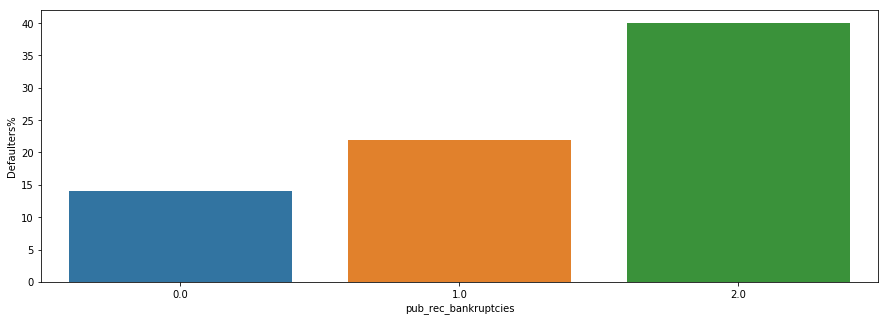

In [145]:
temp=loan.groupby(['pub_rec_bankruptcies','loan_status']).agg({'P&L':'count'})
temp=temp.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))
temp1={'Defaulters%':{}}

for name in loan.pub_rec_bankruptcies.dropna().unique():
    temp1['Defaulters%'][name]=temp['P&L'][name]['Charged Off']
temp=pd.DataFrame(temp1).sort_values(by = 'Defaulters%', ascending = False)
temp  = temp .reset_index()

plt.figure(figsize=(15,5))

sns.barplot(x='index',y='Defaulters%',data=temp)
plt.xlabel("pub_rec_bankruptcies")
plt.ylabel("Defaulters%")
plt.show()

### From above plot we can conclude that there are more % of defaulters with pub_rec_bankruptcies=2


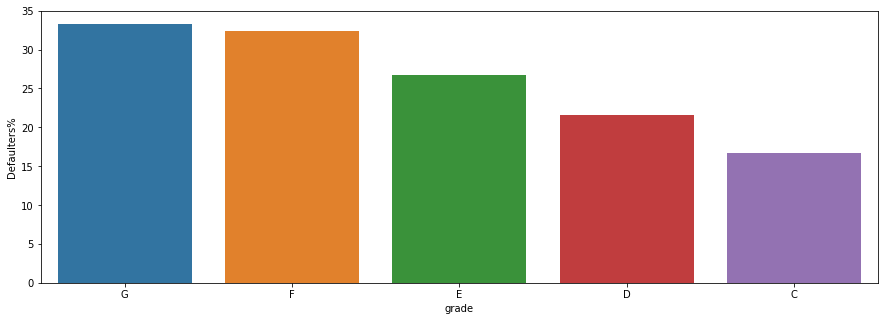

In [146]:
temp=loan.groupby(['grade','loan_status']).agg({'P&L':'count'})
temp=temp.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))
temp1={'Defaulters%':{}}

for name in loan.grade.dropna().unique():
    temp1['Defaulters%'][name]=temp['P&L'][name]['Charged Off']
temp=pd.DataFrame(temp1).sort_values(by = 'Defaulters%', ascending = False)
temp  = temp .sort_values(by = 'Defaulters%', ascending = False)
temp  = temp.iloc[:5, ]
temp  = temp .reset_index()
plt.figure(figsize=(15,5))

sns.barplot(x='index',y='Defaulters%',data=temp)
plt.xlabel("grade")
plt.ylabel("Defaulters%")
plt.show()

### From above plot we can conclude that there are more % of defaulters with Grade='G'


## Conclusions:-

After our EDA using Univariate,Segmented Univariate, Bivariate and Derived Metrics, the below features were most
indicatve of Defaulting Customers:-

<li>1. interest_rate</li>
<li>2. annual_income</li>
<li>3. Debt to income ratio</li>
<li>4. total_paymnt ( Total Payment )</li>
<li>5. revol_util ( Revolving balance utilization)</li>
<li>6. loan amount</li>
<li>7. Home ownership </li>
<li>8. Emp Length </li>
<li>9. Purpose </li>
<li>10. Grades </li>